In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Dataset to Python Environment

In [4]:
data=pd.read_csv("mushrooms.csv")

In [5]:
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

# 3. Understand the data

In [6]:
# Print first 5 rows of data
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
data.shape

(8124, 23)

In [9]:
data.apply(lambda x:len(x.unique()))

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [10]:
# Checking for unique values
lst=[]
for i in data.columns:
    lst.append(data[i].unique())
df=pd.DataFrame({'Columns':data.columns, 'Unique Values':lst})
df

Columns                         Unique Values
0                      class                                [p, e]
1                  cap-shape                    [x, b, s, f, k, c]
2                cap-surface                          [s, y, f, g]
3                  cap-color        [n, y, w, g, e, p, b, u, c, r]
4                    bruises                                [t, f]
5                       odor           [p, a, l, n, f, c, y, s, m]
6            gill-attachment                                [f, a]
7               gill-spacing                                [c, w]
8                  gill-size                                [n, b]
9                 gill-color  [k, n, g, p, w, h, u, e, b, r, y, o]
10               stalk-shape                                [e, t]
11                stalk-root                       [e, c, b, r, ?]
12  stalk-surface-above-ring                          [s, f, k, y]
13  stalk-surface-below-ring                          [s, f, y, k]
14    stalk-color-above-ring           [w, g, p, n, b, e, o, c, y]
15    stalk-color-below-ring           [w, p, g, b, n, e, y, o, c]
16                 veil-type                                   [p]
17                veil-color                          [w, n, o, y]
18               ring-number                             [o, t, n]
19                 ring-type                       [p, e, l, f, n]
20         spore-print-color           [k, n, u, h, w, r, o, y, b]
21                population                    [s, n, a, v, y, c]
22                   habitat                 [u, g, m, d, p, w, l]

#### Here all columns are nominal data. These needs to be encoded.

## 3.1 EDA

In [11]:
df=data.copy()

In [12]:
df['class']=df['class'].map({'p':'Poisonous', 'e':'Edible'})
df['cap-shape']=df['cap-shape'].map({"b": "bell", "c": "conical", "x": "convex", "f": "flat", "k": "knobbed", "s": "sunken"})
df['cap-surface']=df['cap-surface'].map({"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"})
df['cap-color']=df['cap-color'].map({'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple','e':'red', 'w':'white', 'y':'yellow'})
df['bruises']=df['bruises'].map({'t':'yes', 'f':'no'})
df['odor']=df['odor'].map({'a':"almond", 'l':"anise", 'c':"creosote", 'y':"fishy", 'f':"foul", 'm':"musty", 'n':"none", 'p':"pungent", 's':"spicy"})
df['gill-attachment']=df['gill-attachment'].map({'a':"attached", 'd':"descending", 'f':"free", 'n':4})
df['gill-spacing']=df['gill-spacing'].map({'c':"close", 'w':"crowded"})
df['gill-size']=df['gill-size'].map({'n':"narrow", 'b':"broad"})
df['gill-color']=df['gill-color'].map({'k':"black", 'n':"brown", 'g':"gray", 'p':"pink", 'w':"white", 'h':"chocolate", 'u':"purple", 'e':"red", 'b':"buff", 'r':" green", 'y':"yellow", 'o': "orange"})
df['stalk-shape']=df['stalk-shape'].map({'e':"enlarging", 't': "tapering"})
df['stalk-root']=df['stalk-root'].map({'b':"bulbous", 'z':"rhizomorphs", 'r':"rooted", '?':"missing" , 'e':"equal", 'u':"cup", 'c':"club"})
df['stalk-surface-above-ring']=df['stalk-surface-above-ring'].map({'s':"smooth", 'f':"fibrous", 'k':"silky", 'y':"scaly"})
df['stalk-surface-below-ring']=df['stalk-surface-below-ring'].map({'s':"smooth", 'f':"fibrous", 'y':"scaly", 'k':"silky"})
df['stalk-color-above-ring']=df['stalk-color-above-ring'].map({'w':"white", 'g':"gray", 'p':"pink", 'n':"brown", 'b':"buff", 'e':"red", 'o':"orange", 'c':"cinnamon", 'y':"yellow"})
df['stalk-color-below-ring']=df['stalk-color-below-ring'].map({'w':"white", 'p':"pink", 'g':"gray", 'b':"buff", 'n':"brown", 'e':"red", 'y':"yellow", 'o':"orange", 'c':"cinnamon"})
df['veil-type']=df['veil-type'].map({"p":"partial"})
df['veil-color']=df['veil-color'].map({'w':"white", 'n':"brown", 'o':"orange", 'y':"yellow"})
df['ring-number']=df['ring-number'].map({'o':"one", 't':"two", 'n':"none"})
df['ring-type']=df['ring-type'].map({'p':"pendant", 'e':"evanescent", 'l':"large", 'f':"flaring", 'n':"none"})
df['spore-print-color']=df['spore-print-color'].map({'k':"black", 'n':"brown", 'u':"purple", 'h':"chocolate", 'w':"white", 'r':"green", 'o':"orange", 'y':"yellow", 'b':"buff"})
df['population']=df['population'].map({'s':"scattered", 'n':"numerous", 'a':"abundant", 'v':"several", 'y': "solitary", 'c':"clustered"})
df['habitat']=df['habitat'].map({'u':"urban", 'g':"grasses", 'm':"meadows", 'd':"woods", 'p':"paths", 'w':"waste", 'l':"leaves"})

In [13]:
df= df.apply(lambda x: x.astype(str).str.upper())

In [14]:
df=df.rename(columns={"class":"CLASS"})
df.head()

CLASS cap-shape cap-surface cap-color bruises     odor gill-attachment  \
0  POISONOUS    CONVEX      SMOOTH     BROWN     YES  PUNGENT            FREE   
1     EDIBLE    CONVEX      SMOOTH    YELLOW     YES   ALMOND            FREE   
2     EDIBLE      BELL      SMOOTH     WHITE     YES    ANISE            FREE   
3  POISONOUS    CONVEX       SCALY     WHITE     YES  PUNGENT            FREE   
4     EDIBLE    CONVEX      SMOOTH      GRAY      NO     NONE            FREE   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0        CLOSE    NARROW      BLACK  ...                   SMOOTH   
1        CLOSE     BROAD      BLACK  ...                   SMOOTH   
2        CLOSE     BROAD      BROWN  ...                   SMOOTH   
3        CLOSE    NARROW      BROWN  ...                   SMOOTH   
4      CROWDED     BROAD      BLACK  ...                   SMOOTH   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                  WHITE                  WHITE   PARTIAL      WHITE   
1                  WHITE                  WHITE   PARTIAL      WHITE   
2                  WHITE                  WHITE   PARTIAL      WHITE   
3                  WHITE                  WHITE   PARTIAL      WHITE   
4                  WHITE                  WHITE   PARTIAL      WHITE   

  ring-number   ring-type spore-print-color population  habitat  
0         ONE     PENDANT             BLACK  SCATTERED    URBAN  
1         ONE     PENDANT             BROWN   NUMEROUS  GRASSES  
2         ONE     PENDANT             BROWN   NUMEROUS  MEADOWS  
3         ONE     PENDANT             BLACK  SCATTERED    URBAN  
4         ONE  EVANESCENT             BROWN   ABUNDANT  GRASSES  

[5 rows x 23 columns]

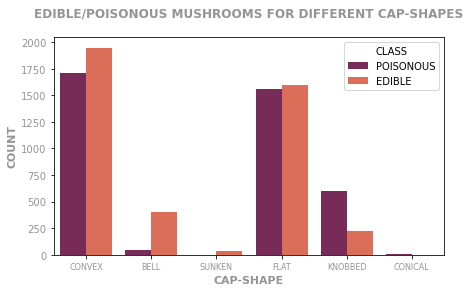

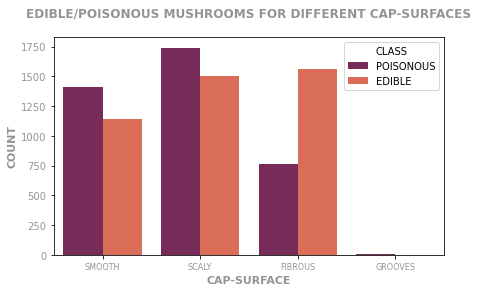

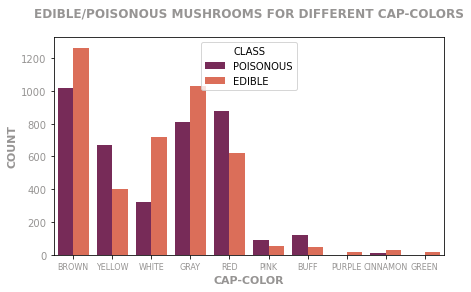

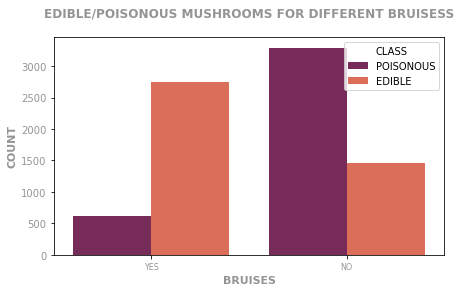

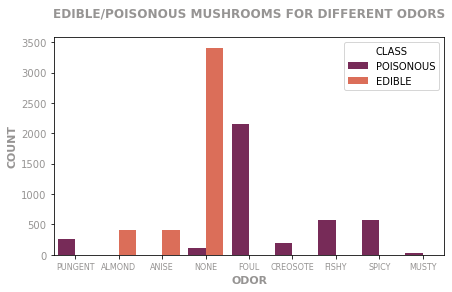

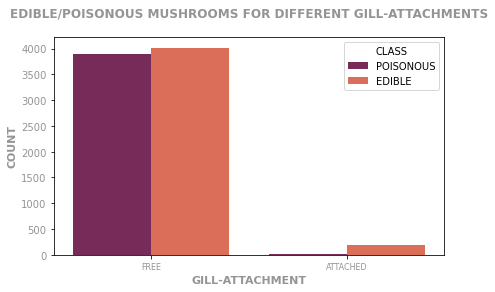

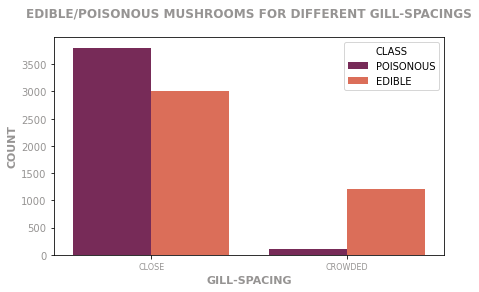

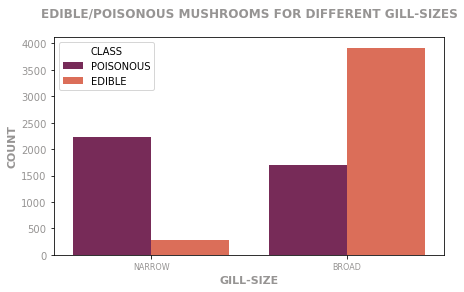

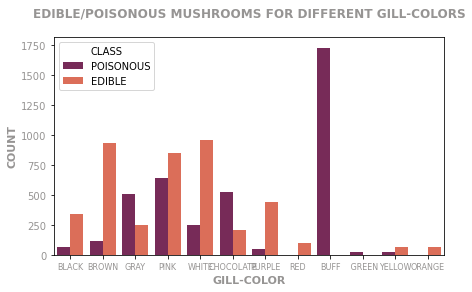

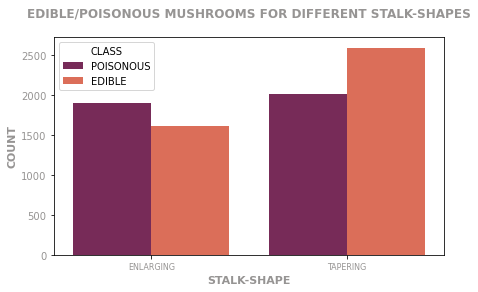

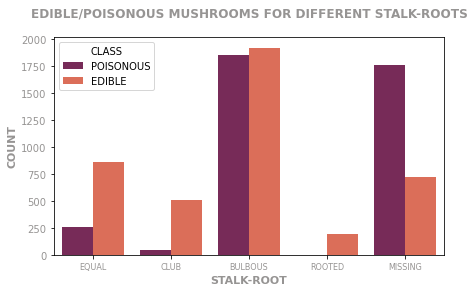

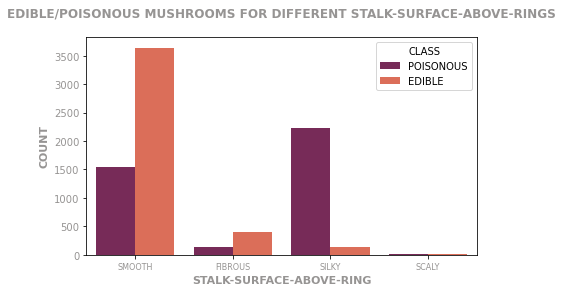

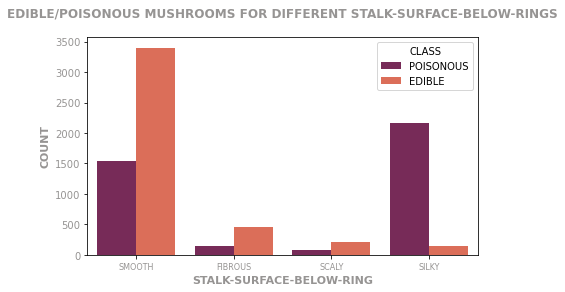

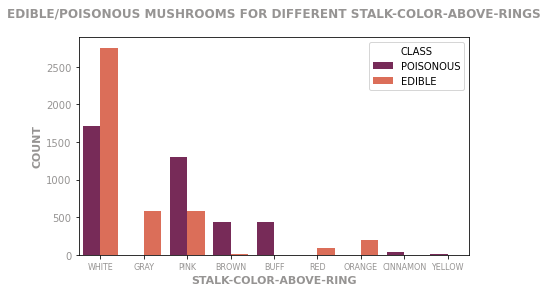

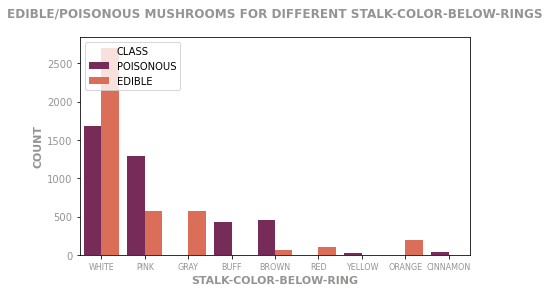

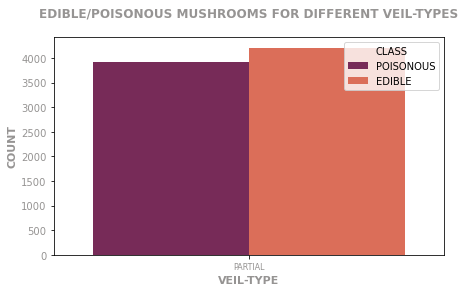

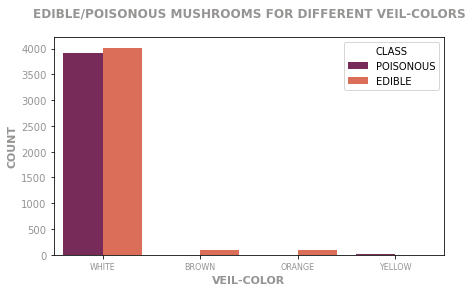

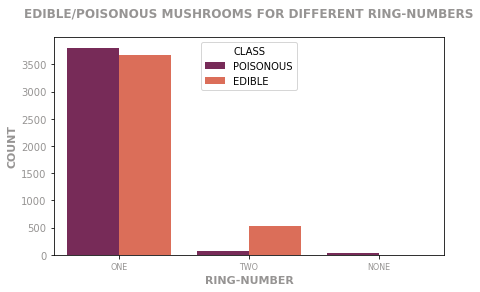

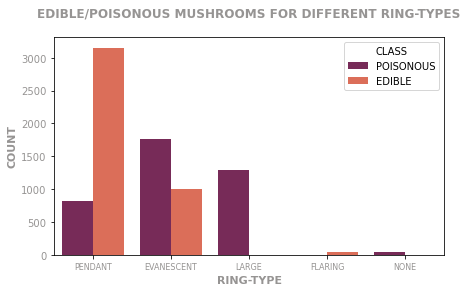

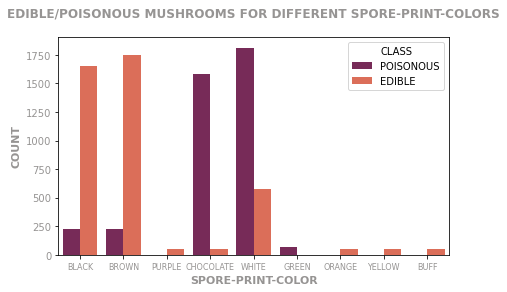

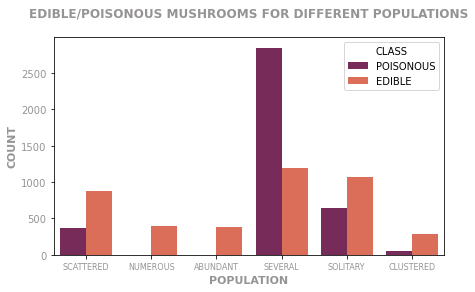

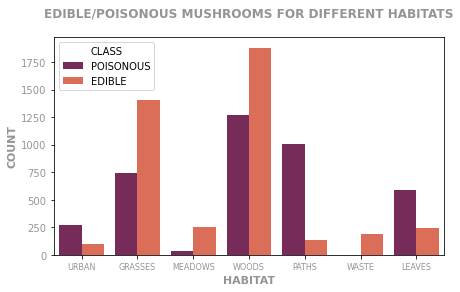

In [15]:
k=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor','gill-attachment', 'gill-spacing', 'gill-size', 'gill-color','stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring','stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type', 'spore-print-color', 'population', 'habitat']
for i in k:
    plt.figure(figsize=(7,4))
    sns.countplot(x=df[i] ,hue=df['CLASS'], palette="rocket")
    j=i.upper()
    plt.title('EDIBLE/POISONOUS MUSHROOMS FOR DIFFERENT '+ j +'S\n', fontweight='bold', fontsize=12, color='#969493')
    plt.xticks(fontsize=8, color='#969493')
    plt.yticks(color='#969493')
    plt.xlabel(j, fontweight='bold', fontsize=11, color='#969493')
    plt.ylabel('COUNT', fontweight='bold', fontsize=11, color='#969493')
    plt.show()

In [20]:
df.columns

Index(['CLASS', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [36]:
df[df.CLASS=="EDIBLE"]['odor']

1       ALMOND
2        ANISE
4         NONE
5       ALMOND
6       ALMOND
         ...  
8115      NONE
8119      NONE
8120      NONE
8121      NONE
8123      NONE
Name: odor, Length: 4208, dtype: object

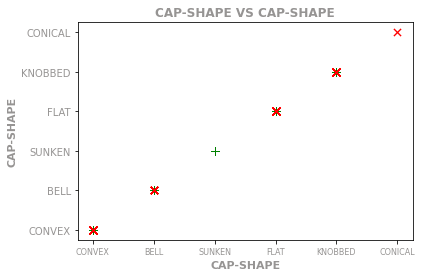

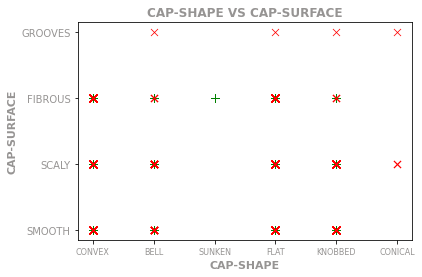

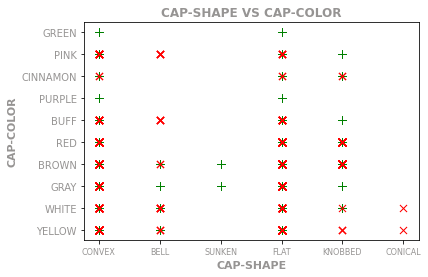

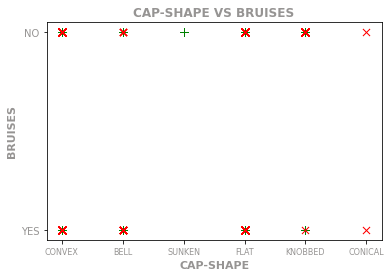

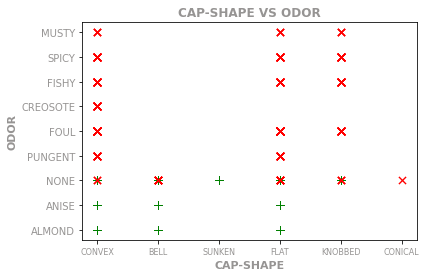

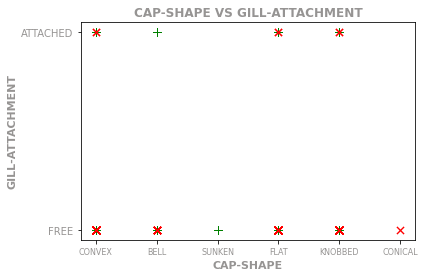

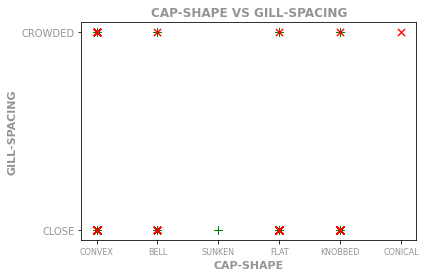

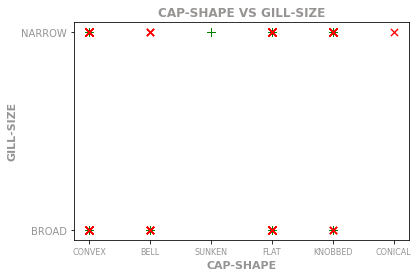

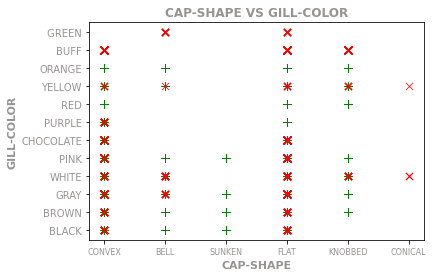

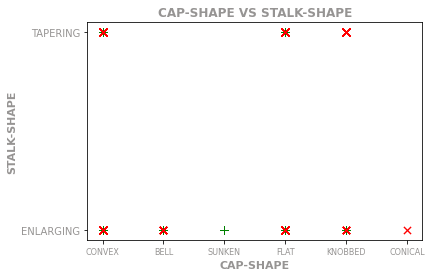

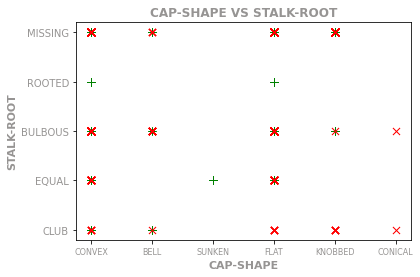

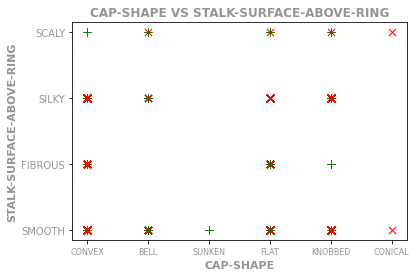

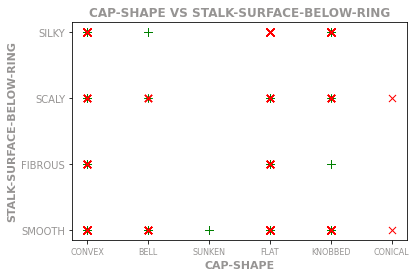

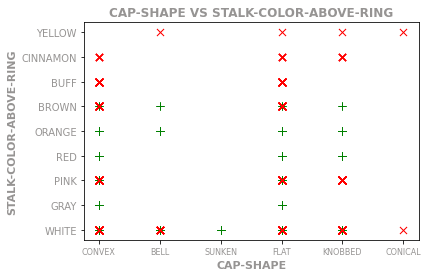

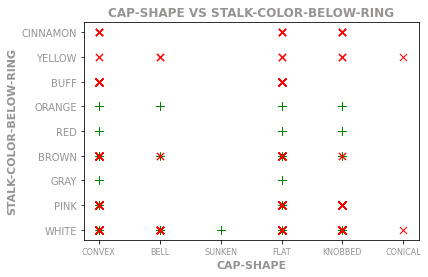

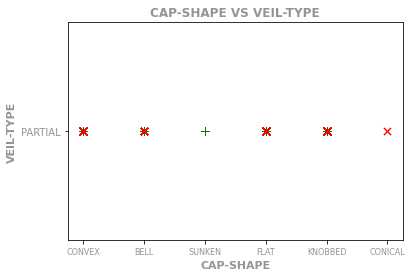

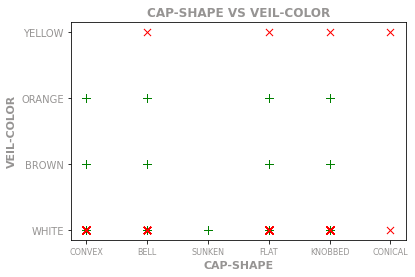

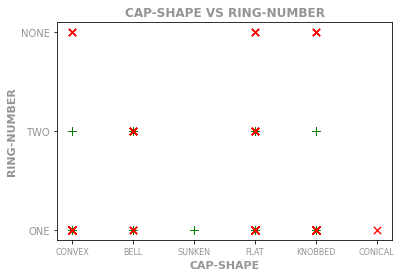

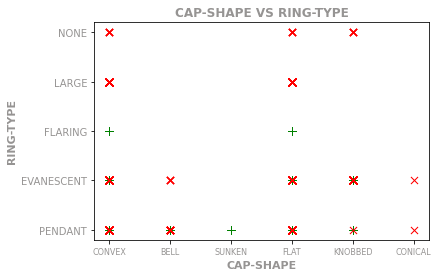

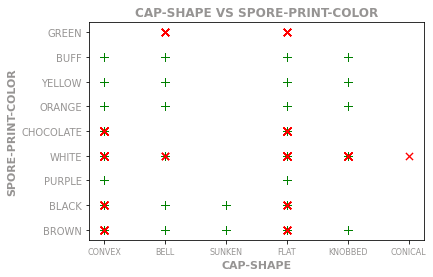

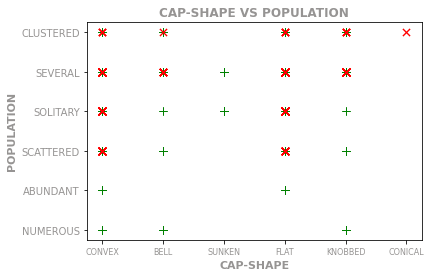

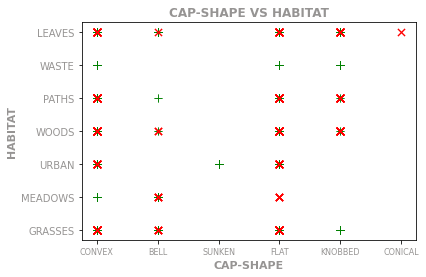

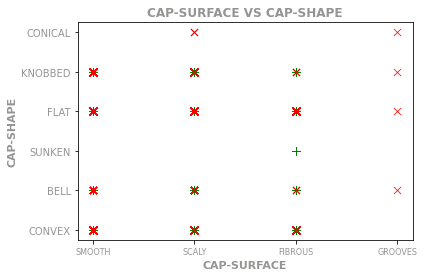

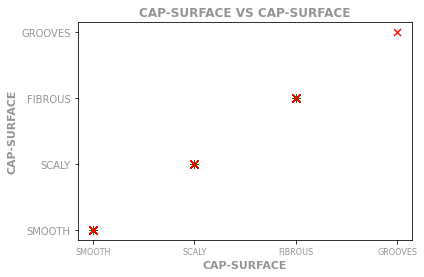

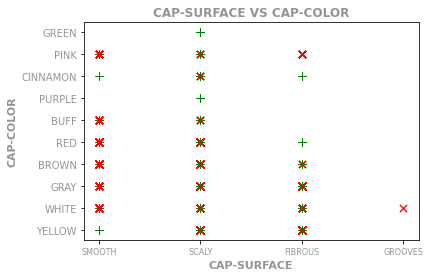

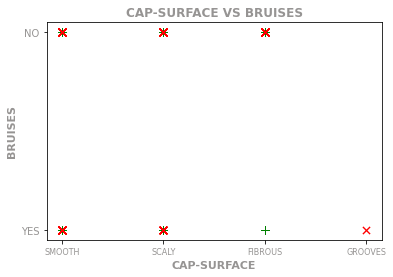

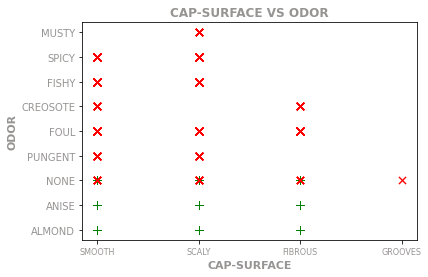

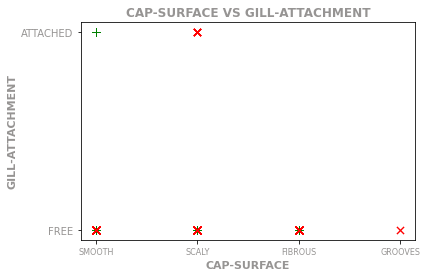

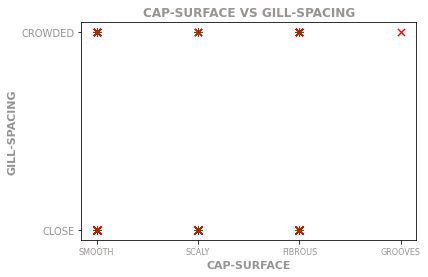

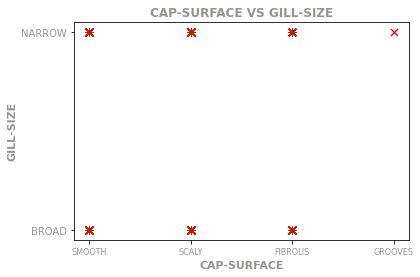

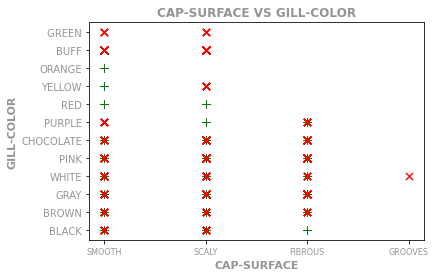

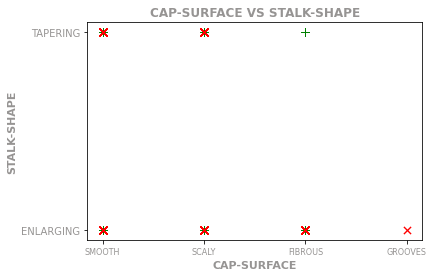

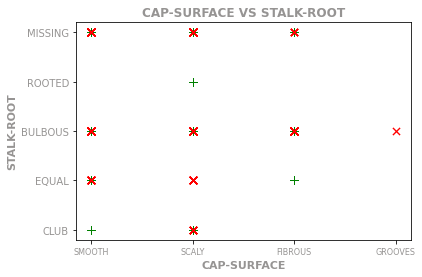

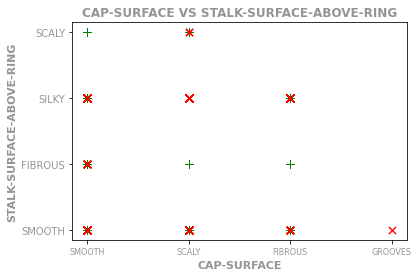

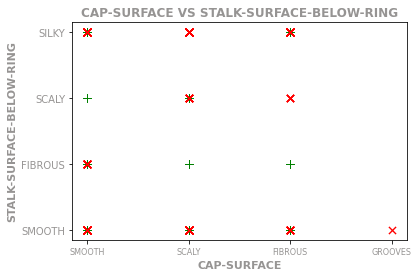

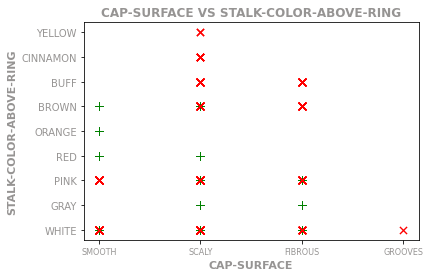

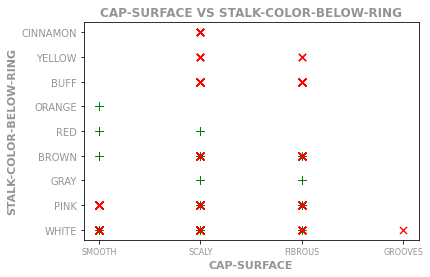

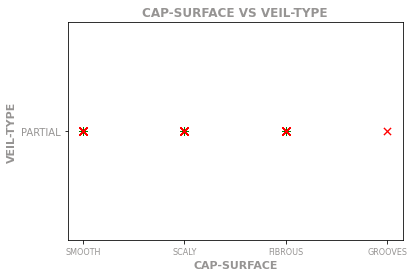

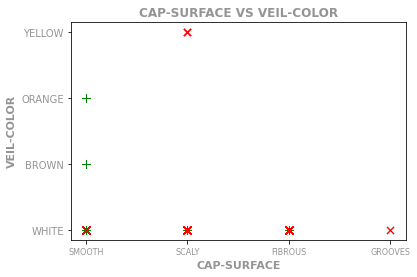

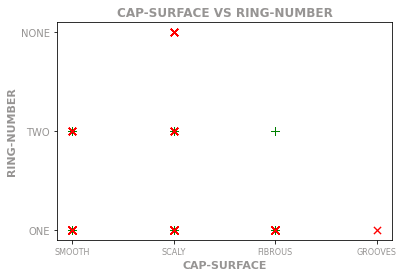

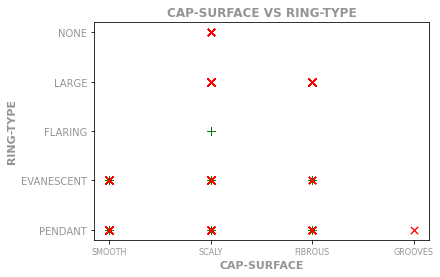

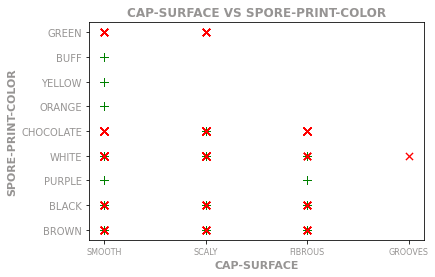

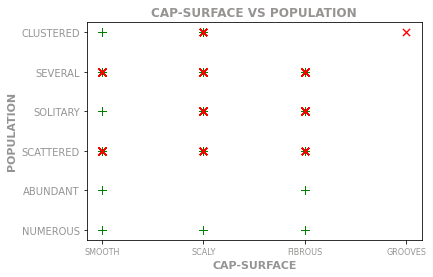

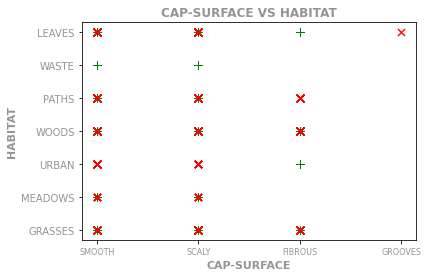

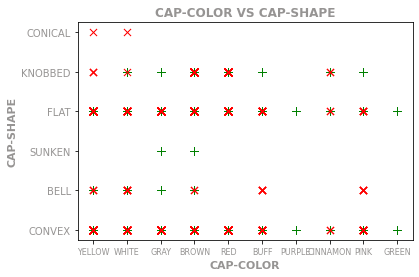

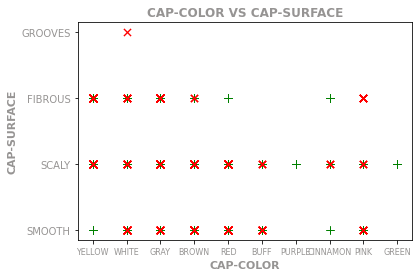

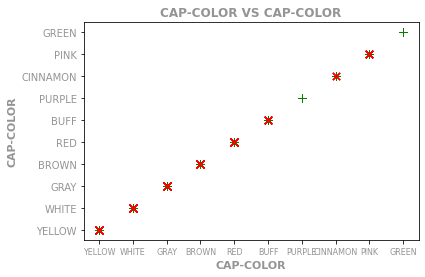

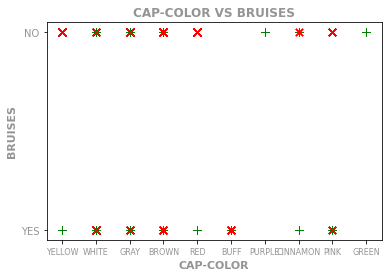

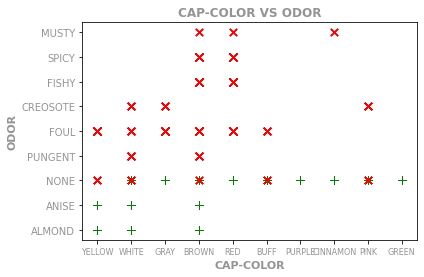

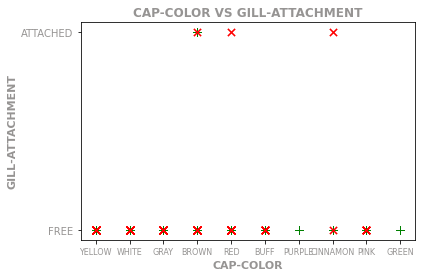

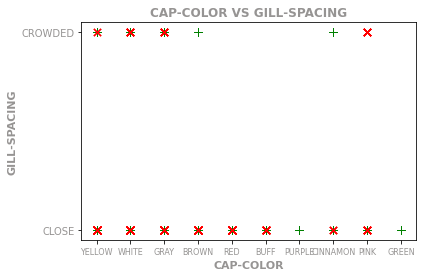

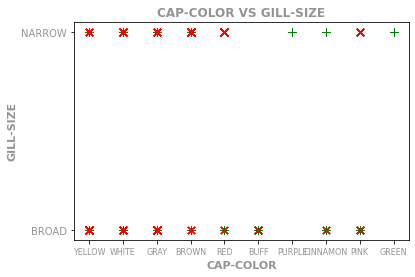

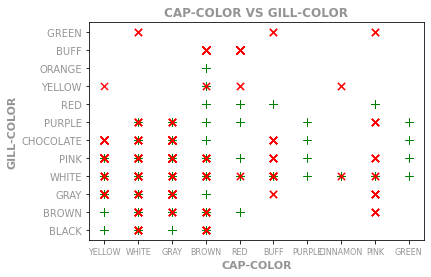

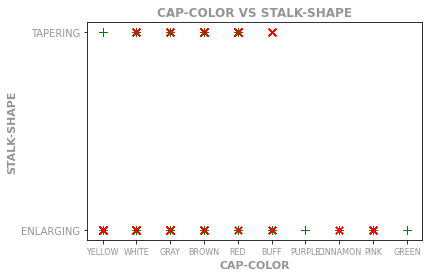

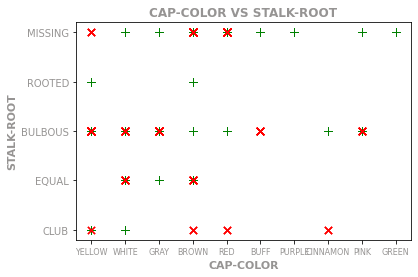

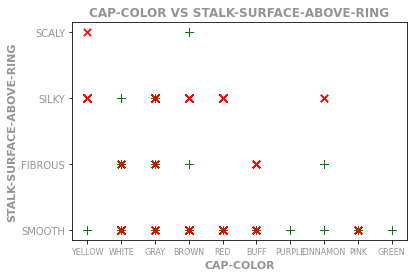

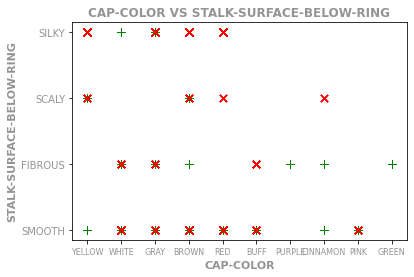

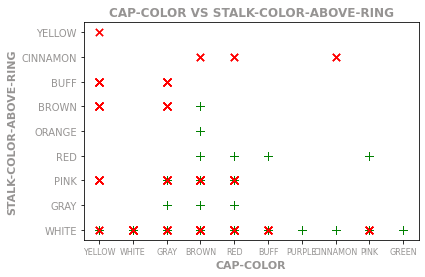

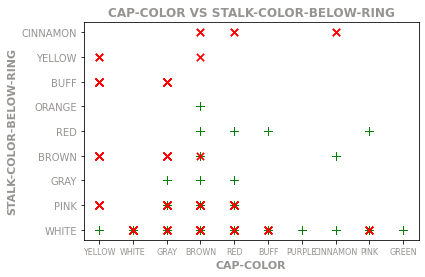

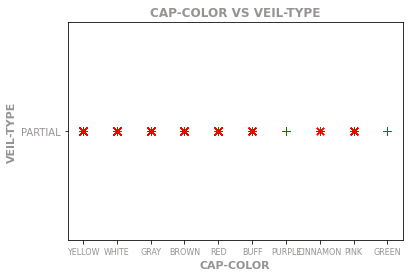

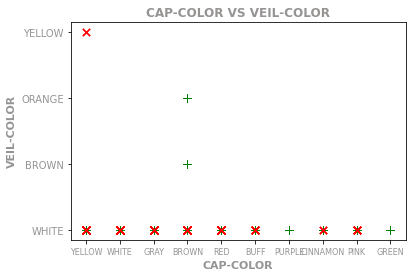

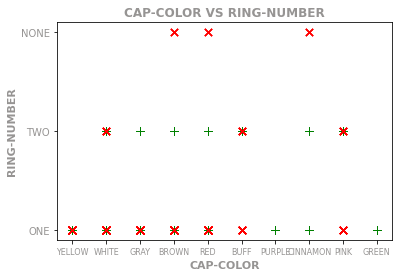

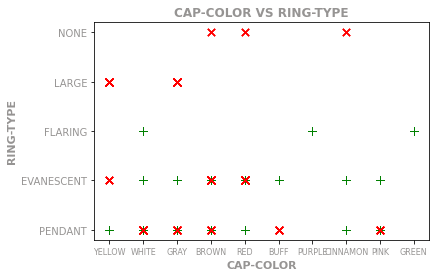

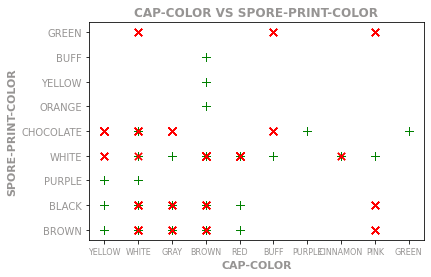

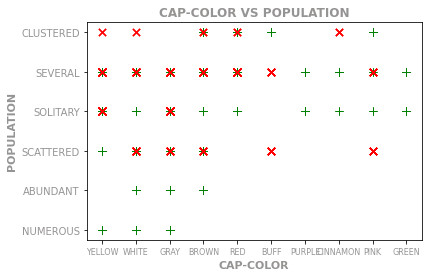

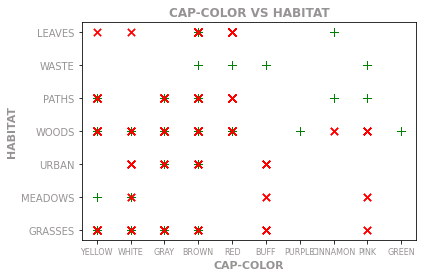

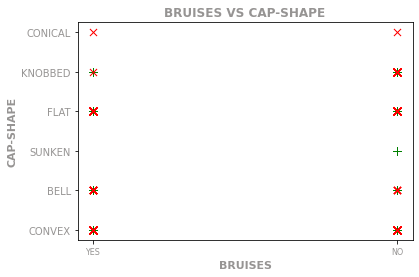

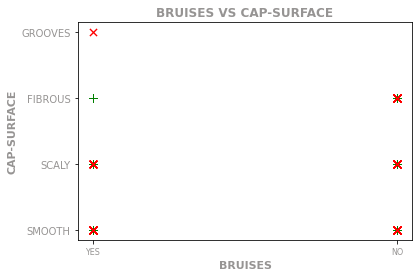

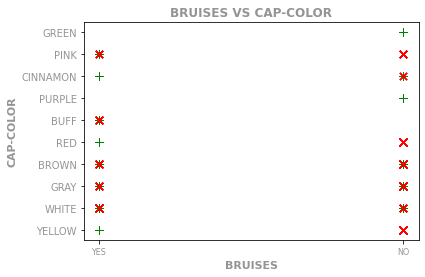

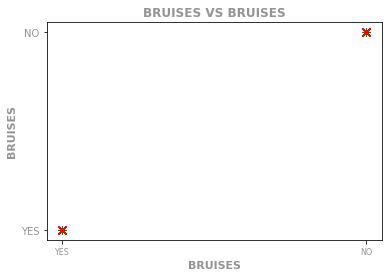

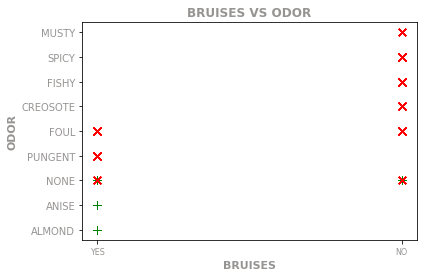

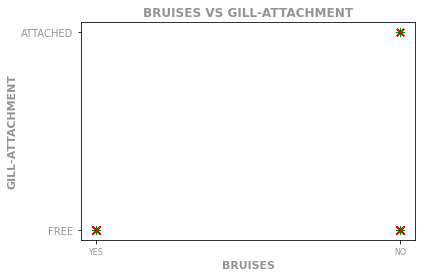

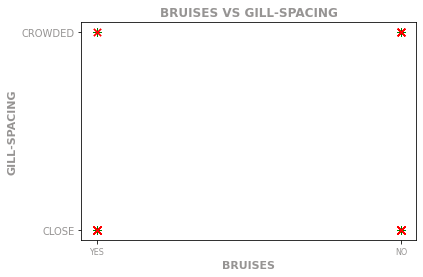

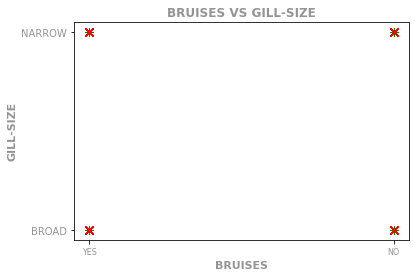

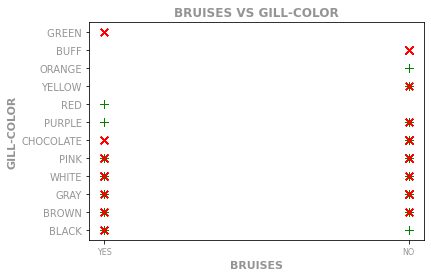

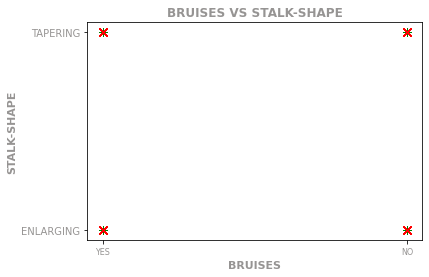

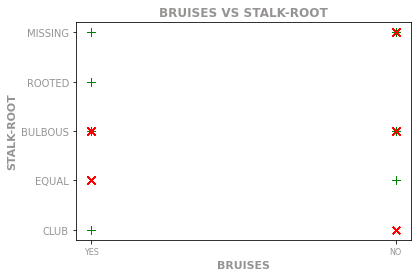

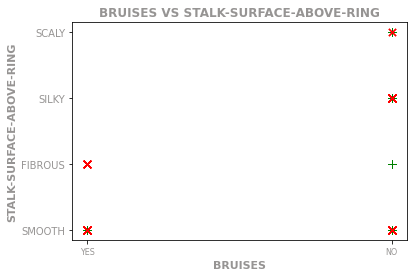

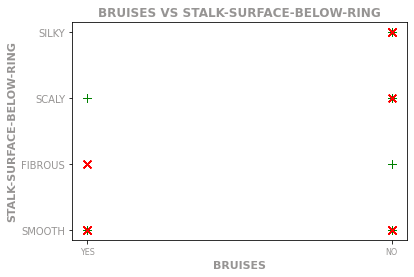

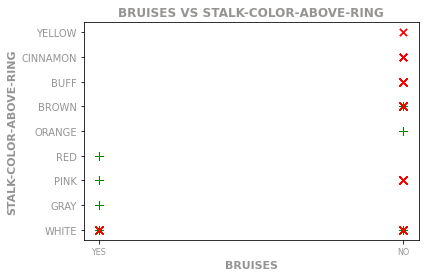

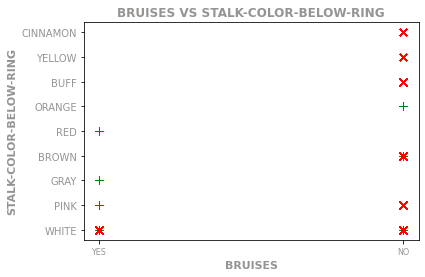

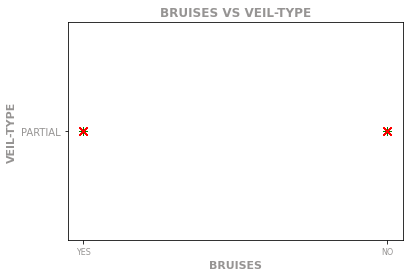

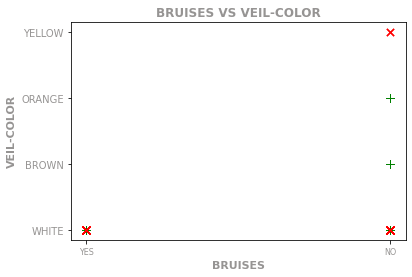

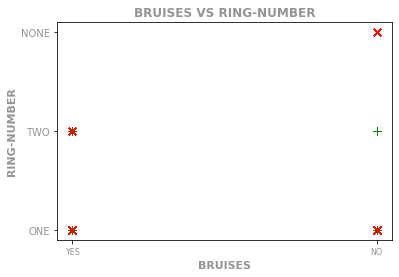

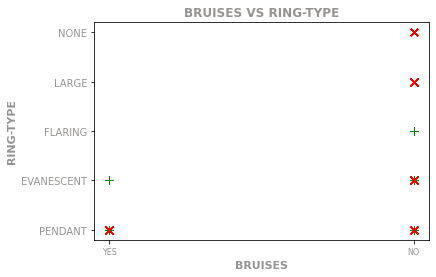

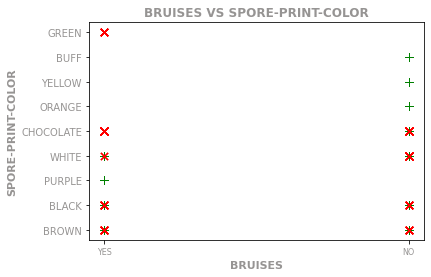

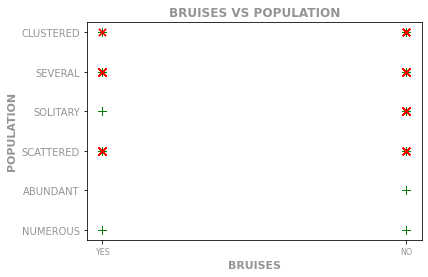

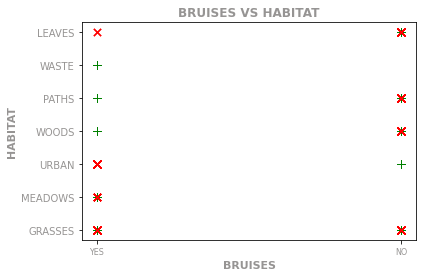

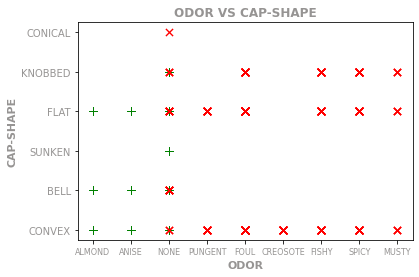

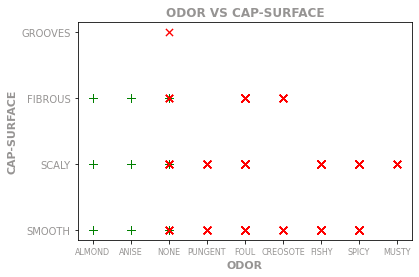

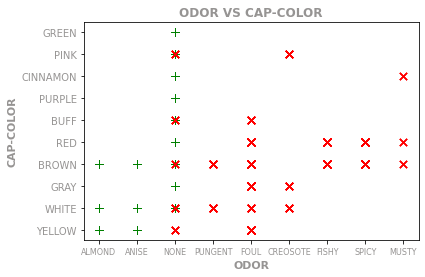

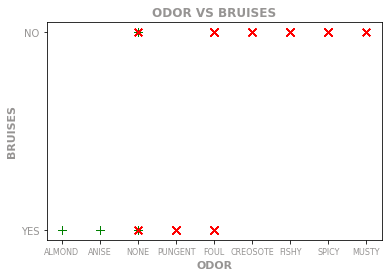

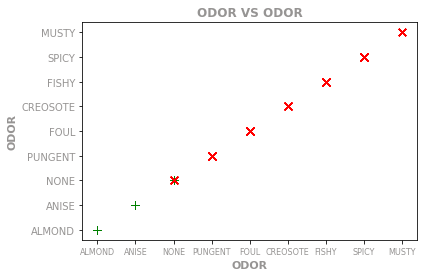

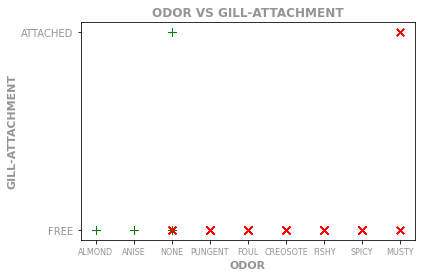

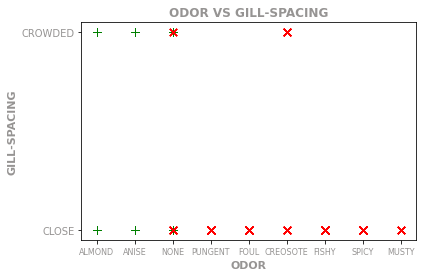

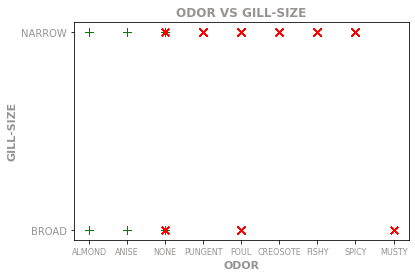

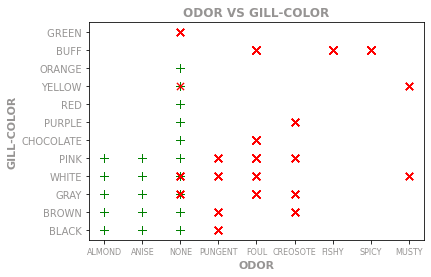

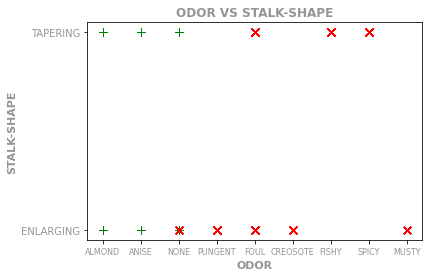

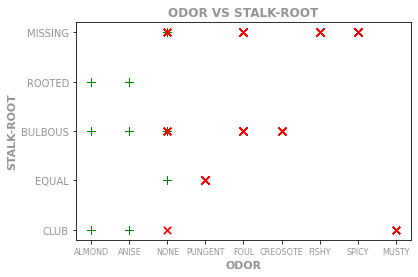

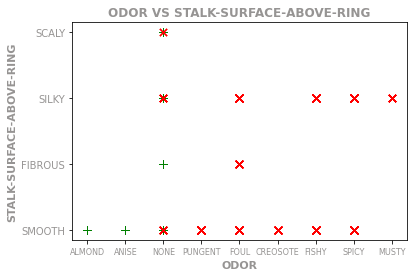

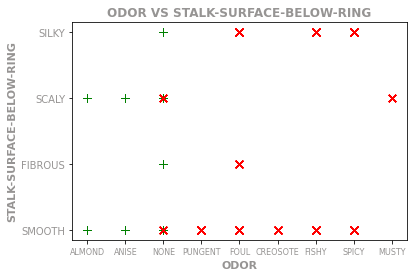

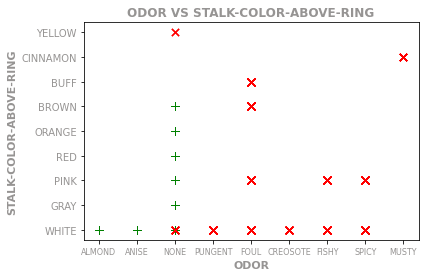

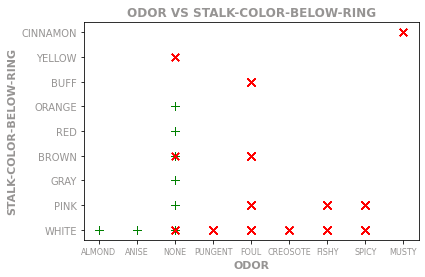

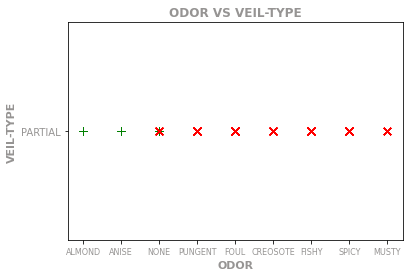

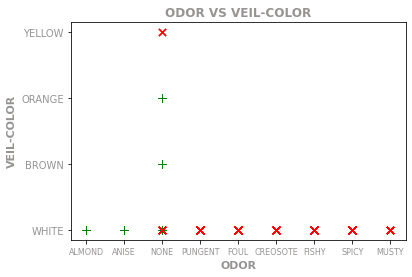

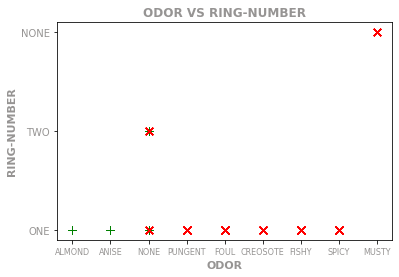

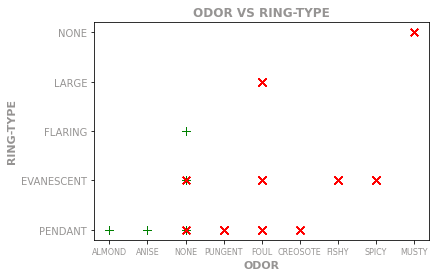

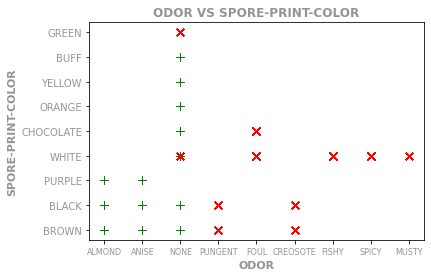

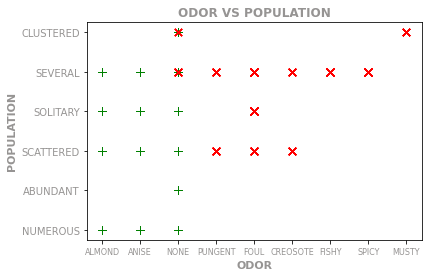

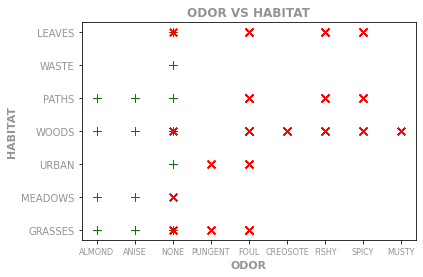

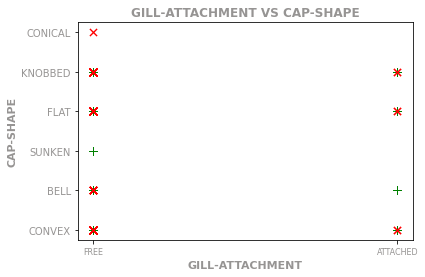

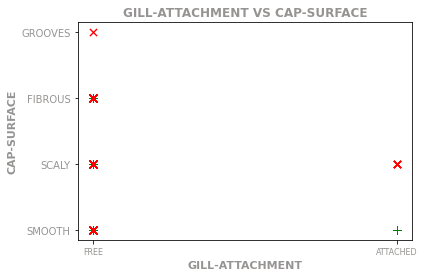

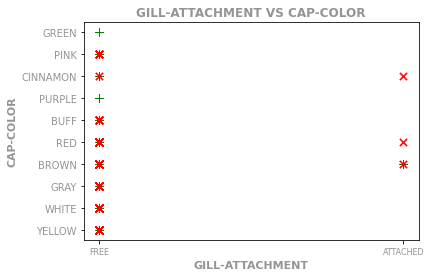

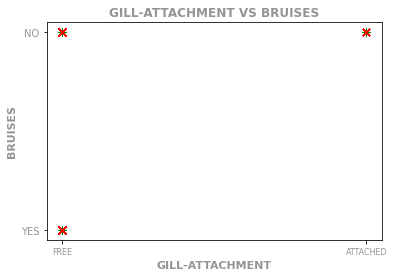

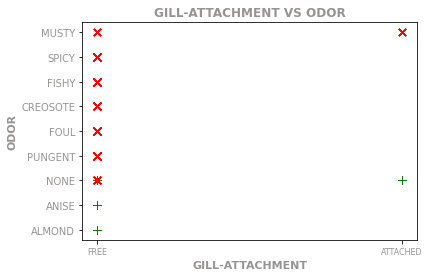

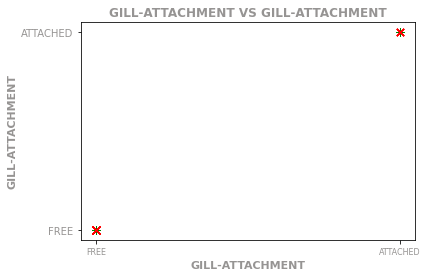

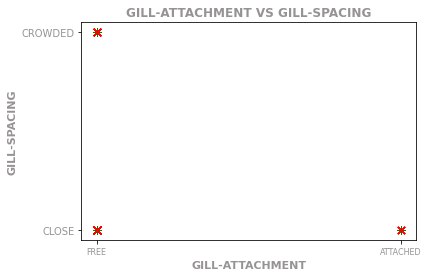

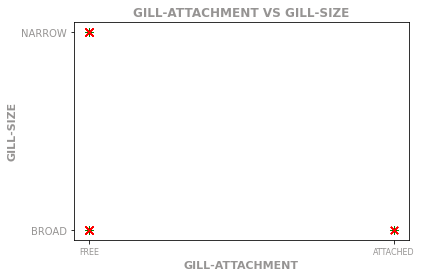

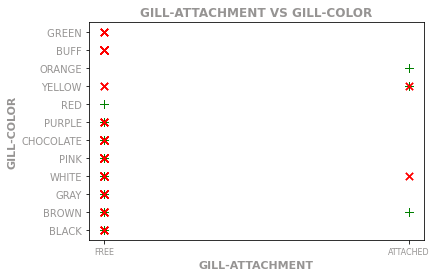

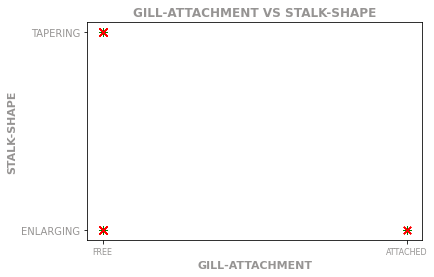

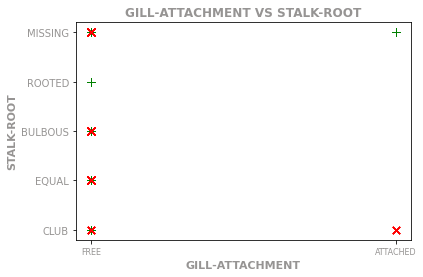

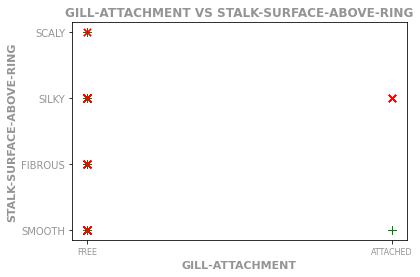

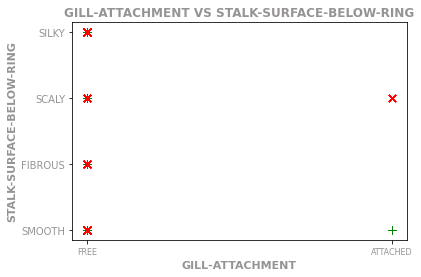

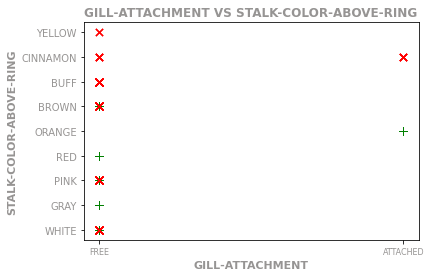

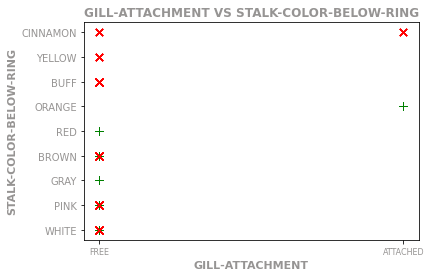

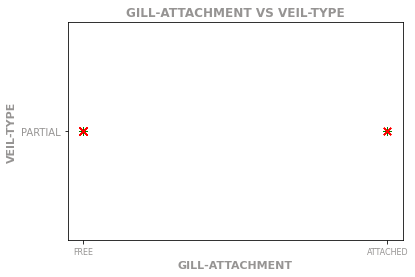

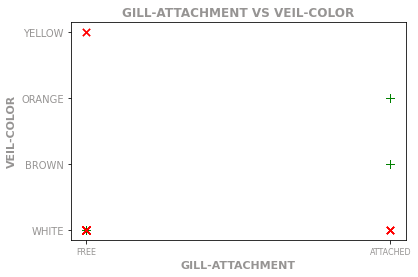

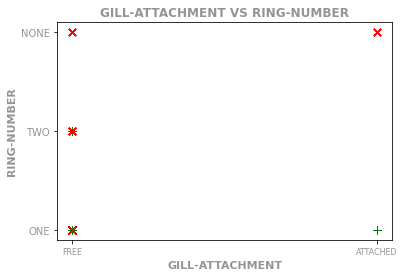

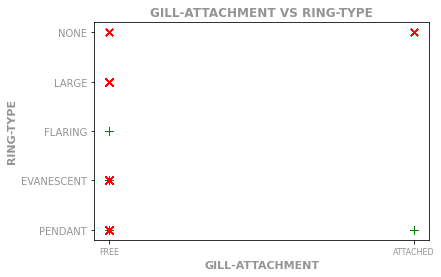

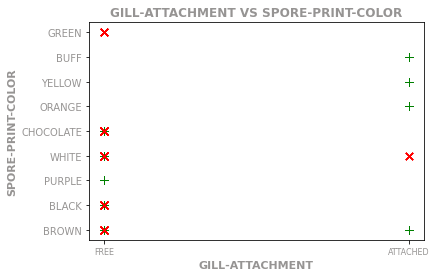

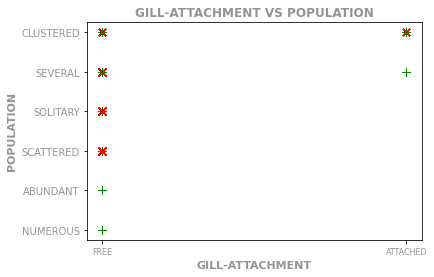

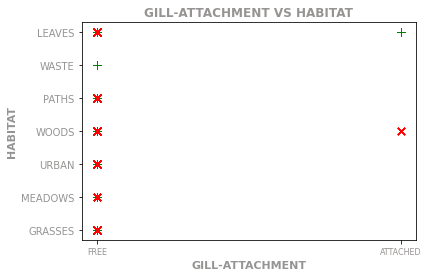

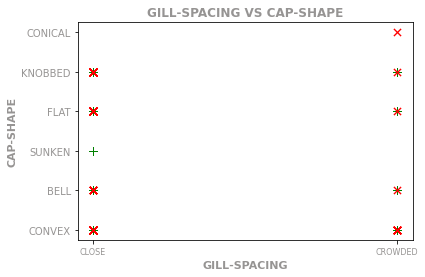

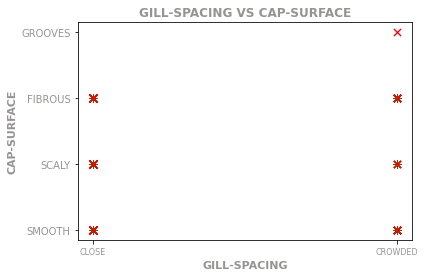

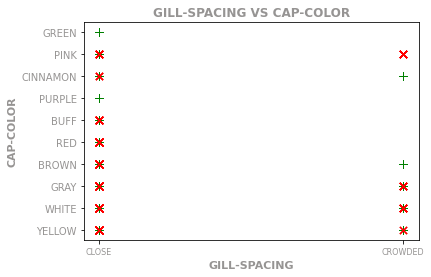

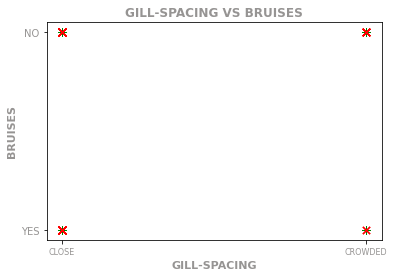

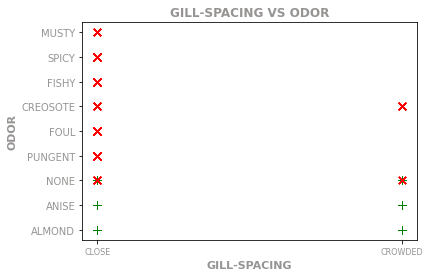

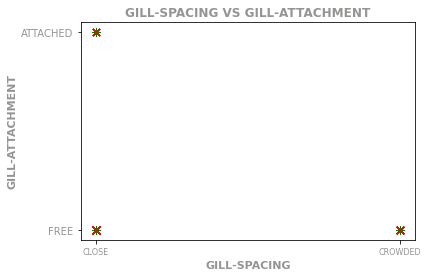

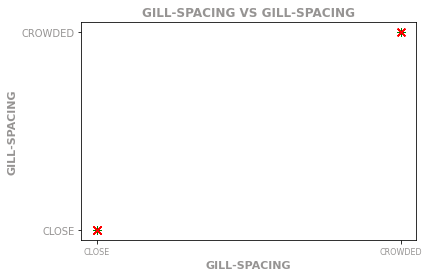

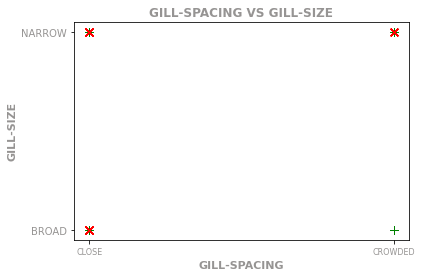

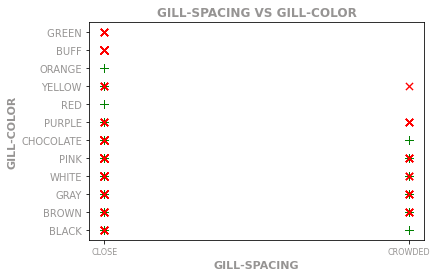

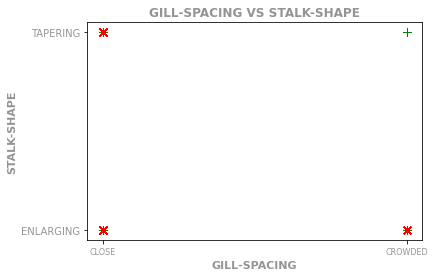

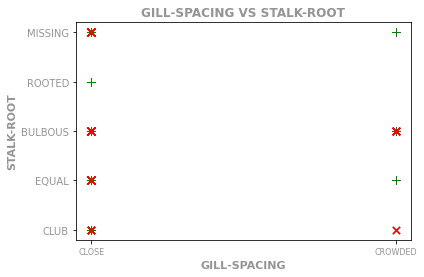

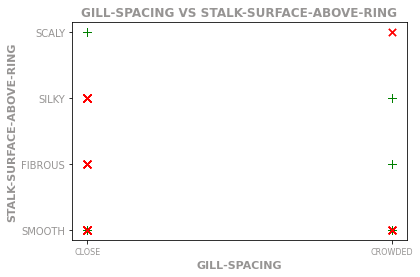

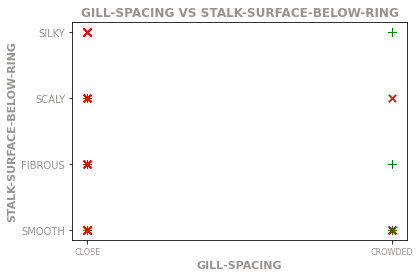

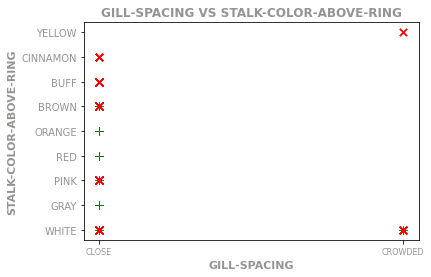

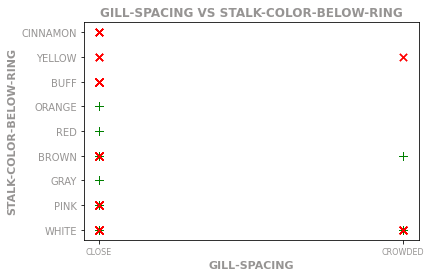

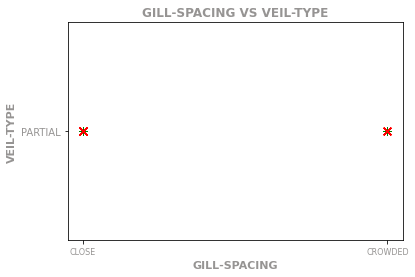

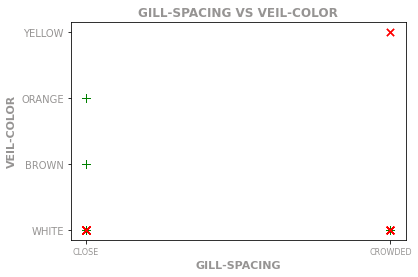

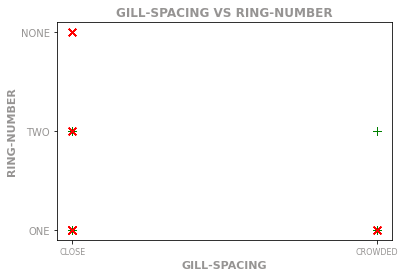

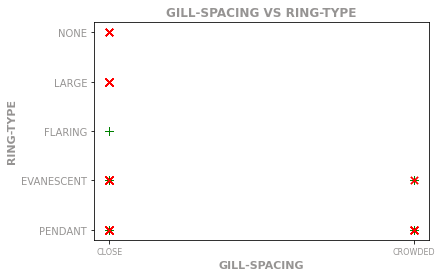

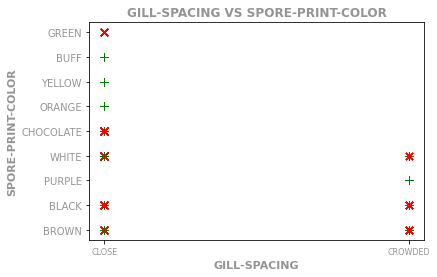

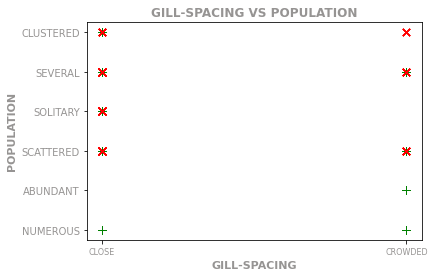

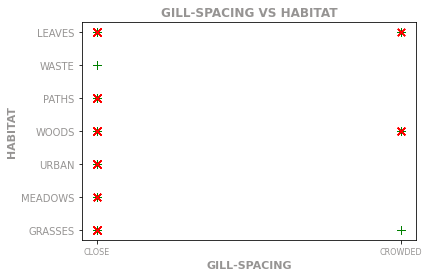

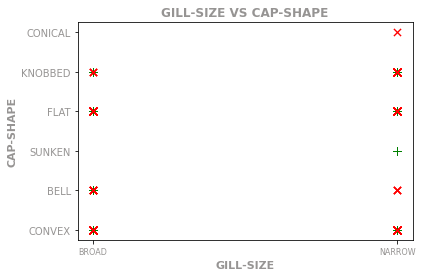

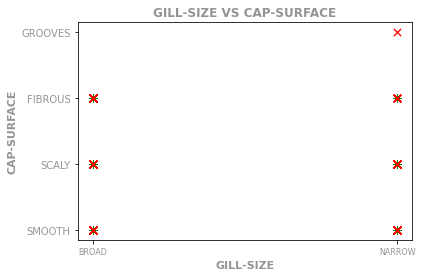

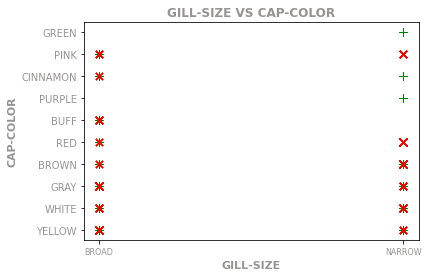

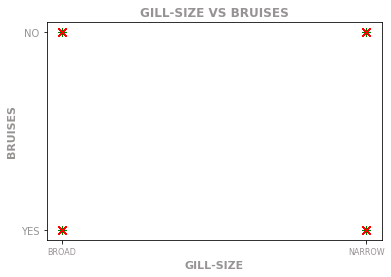

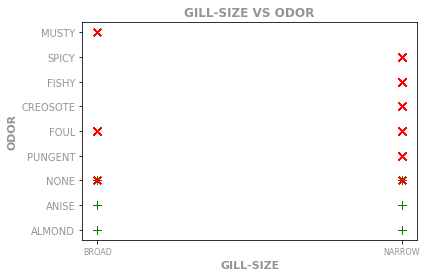

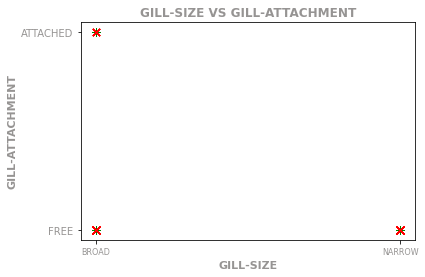

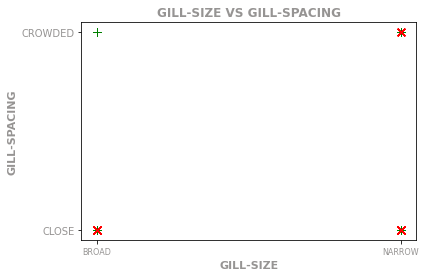

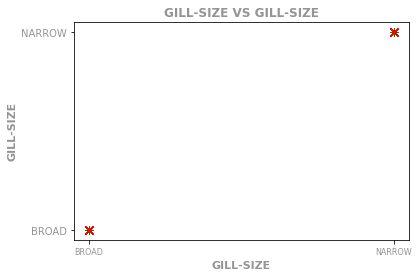

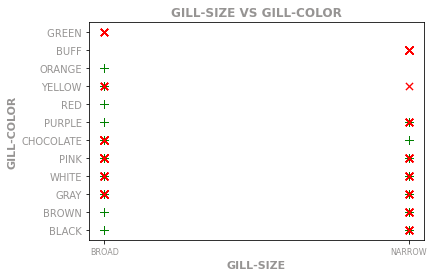

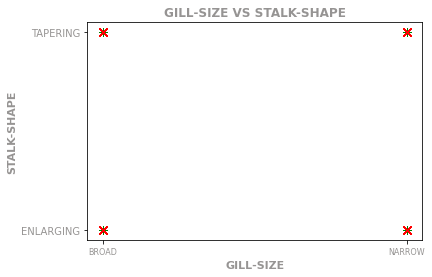

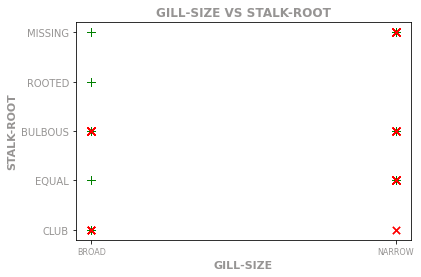

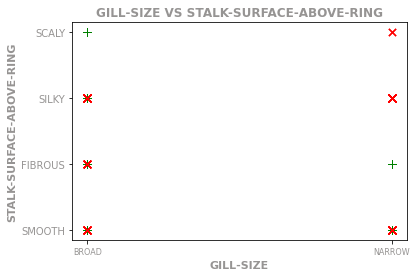

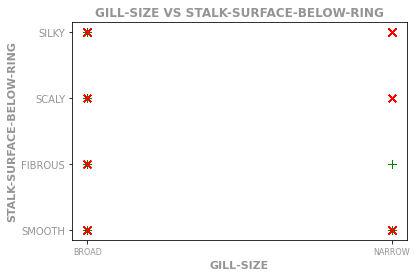

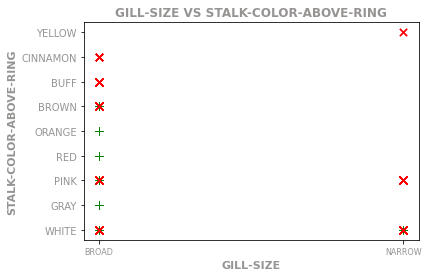

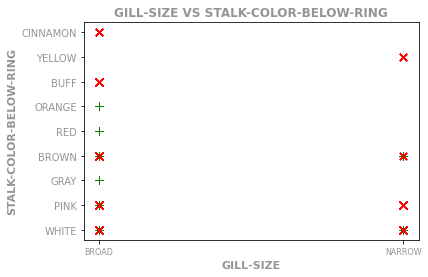

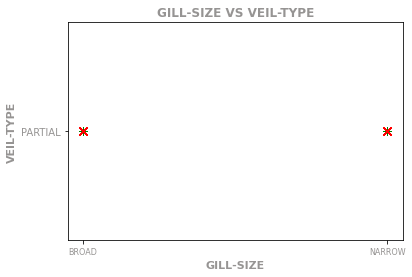

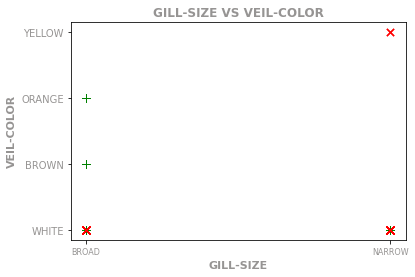

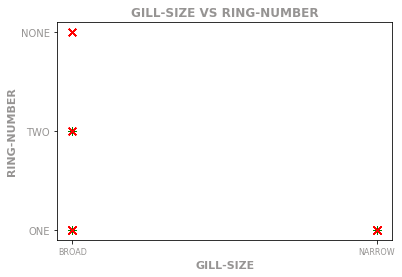

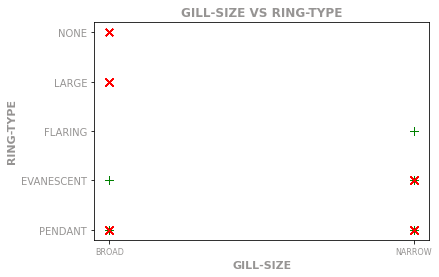

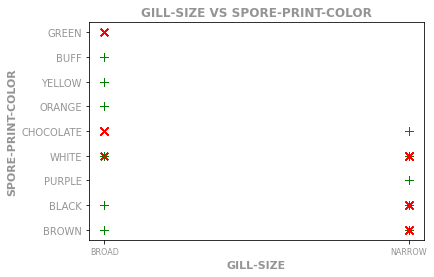

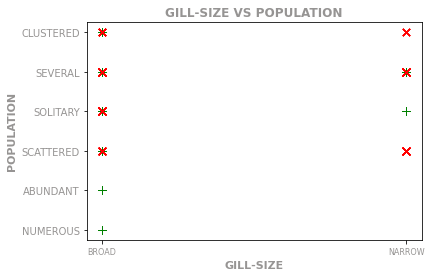

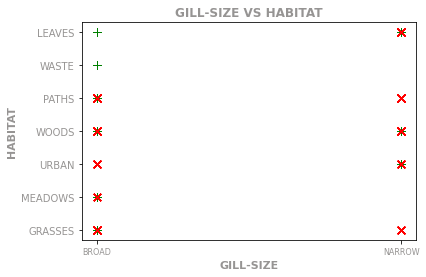

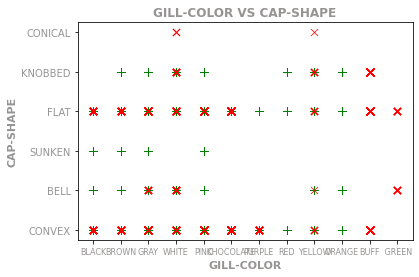

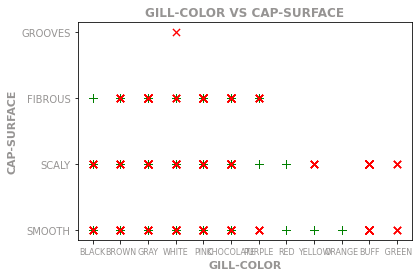

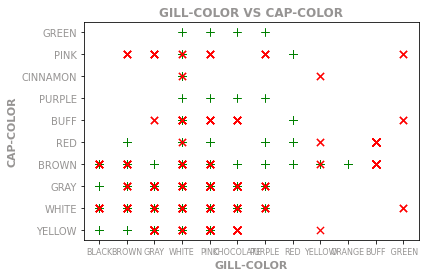

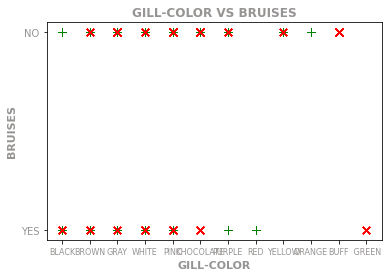

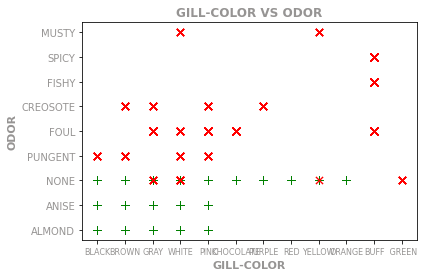

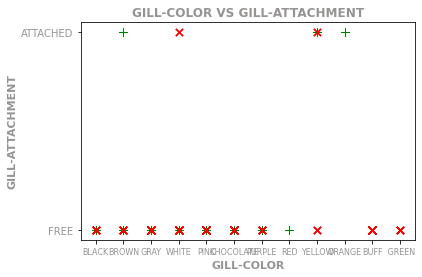

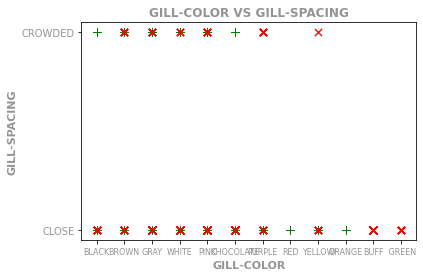

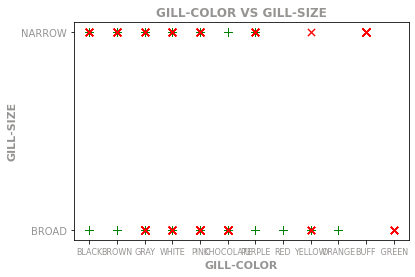

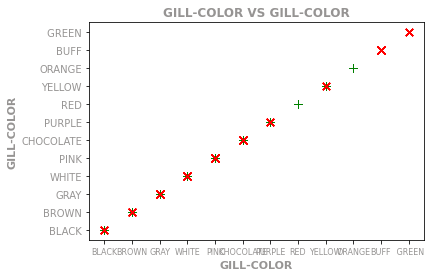

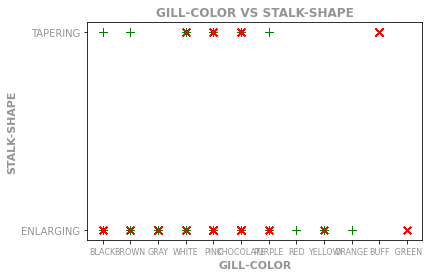

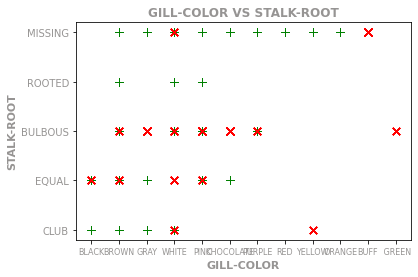

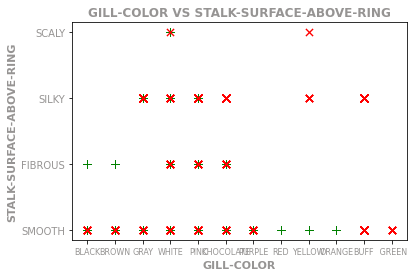

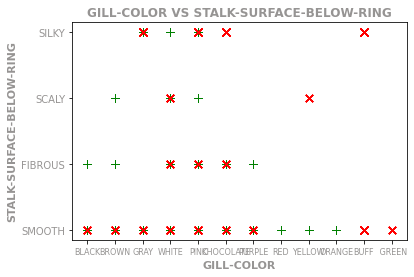

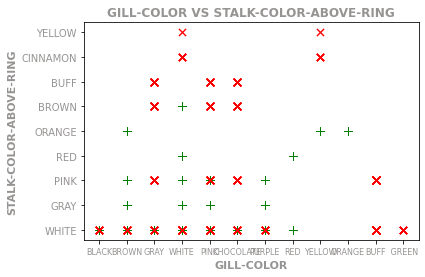

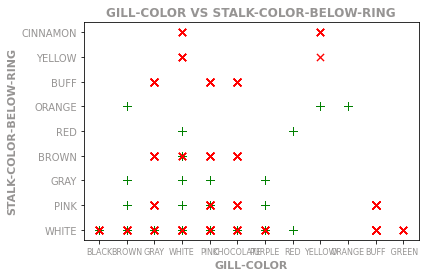

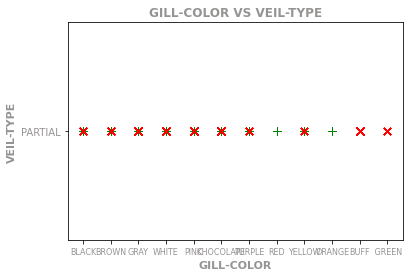

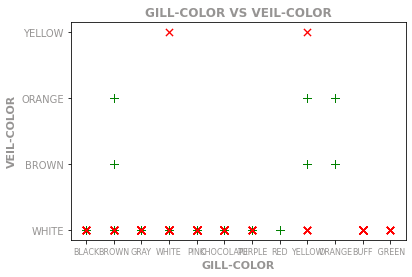

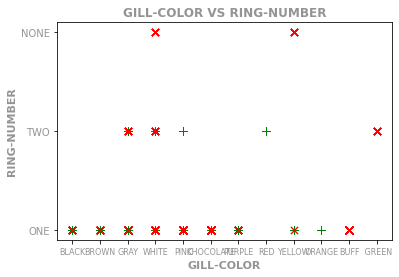

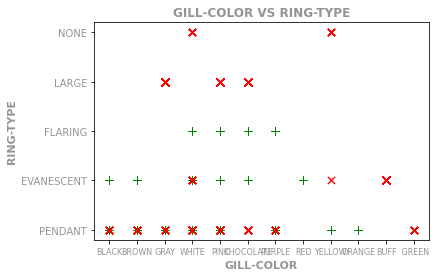

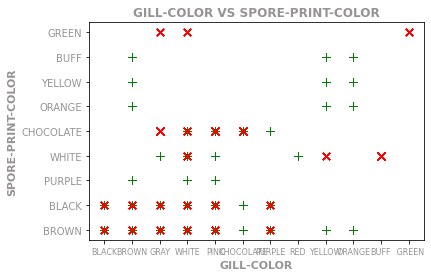

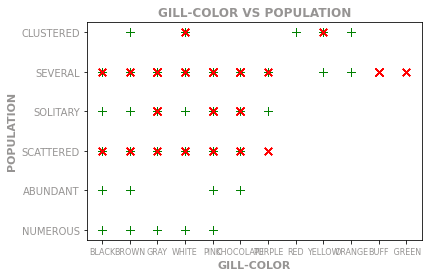

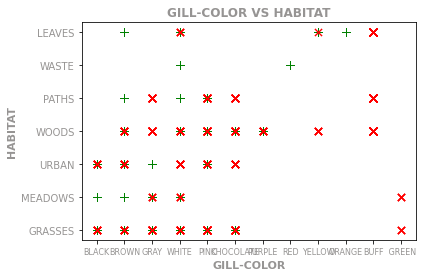

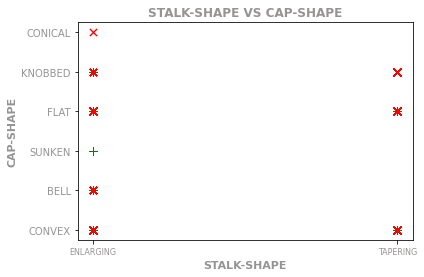

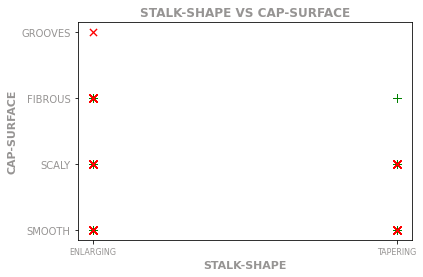

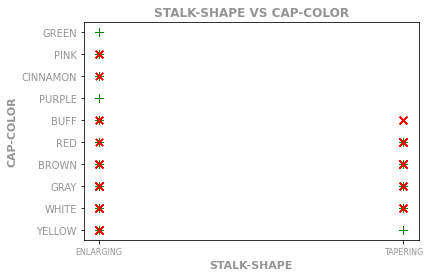

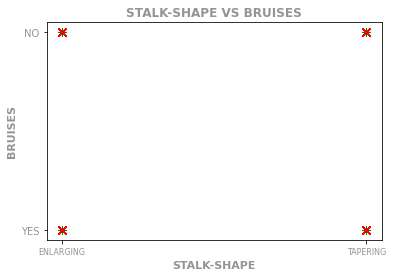

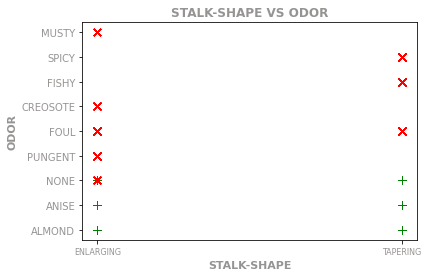

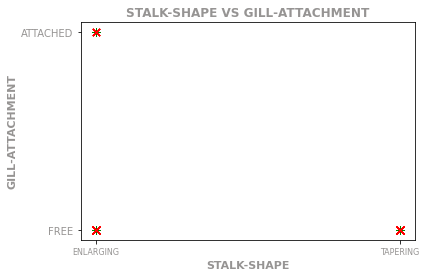

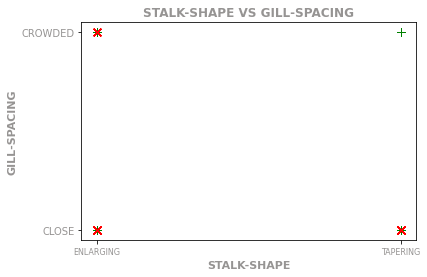

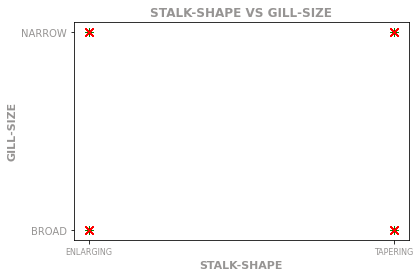

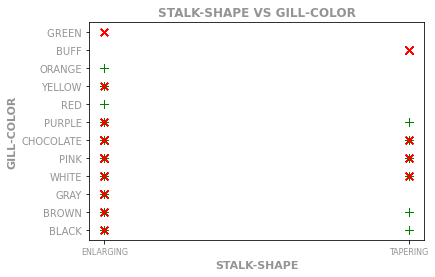

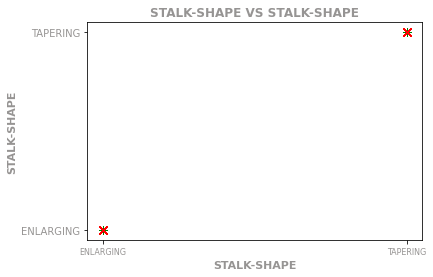

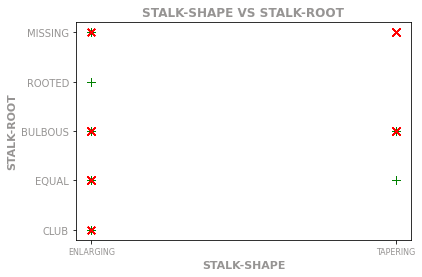

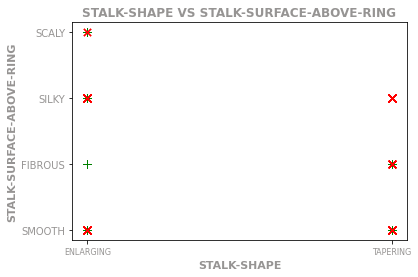

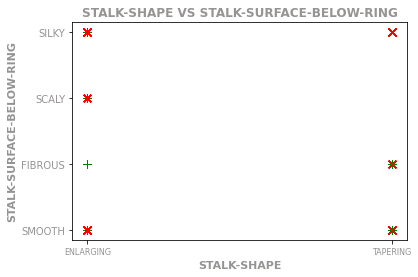

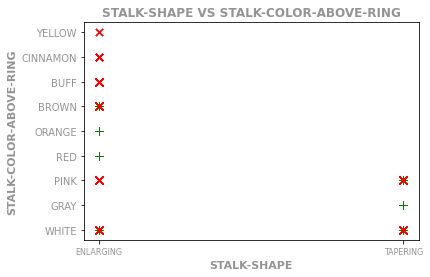

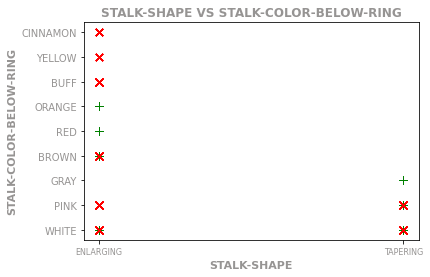

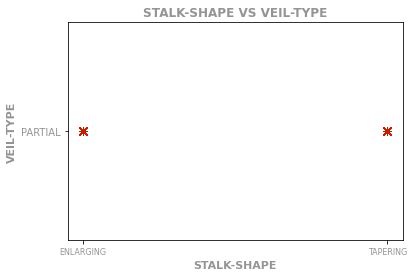

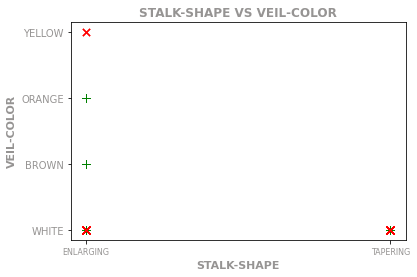

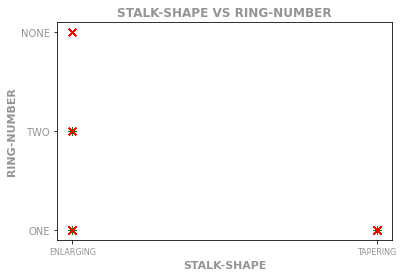

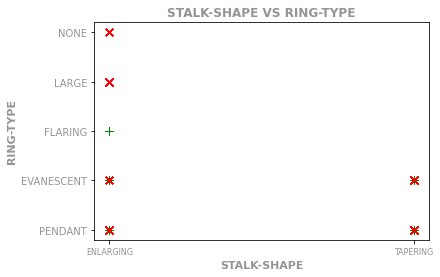

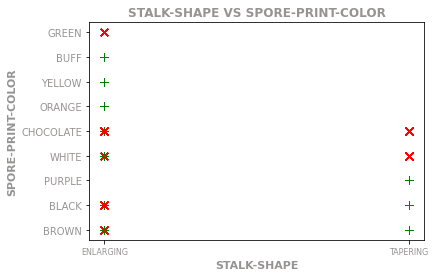

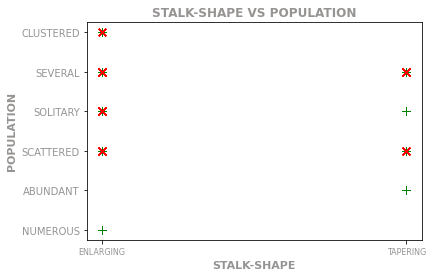

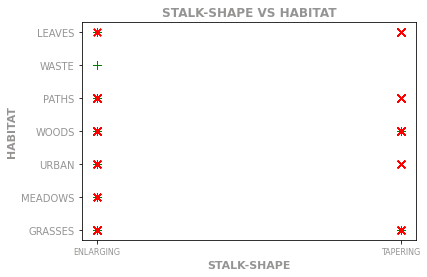

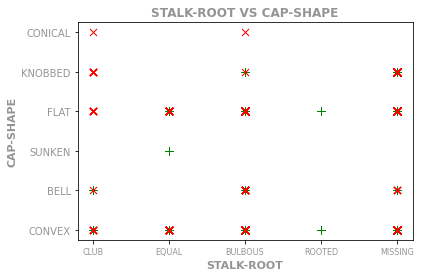

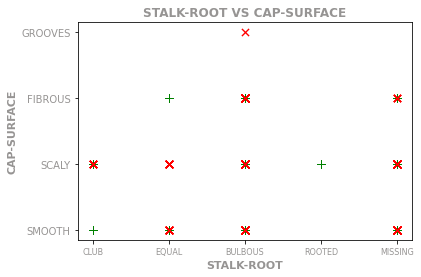

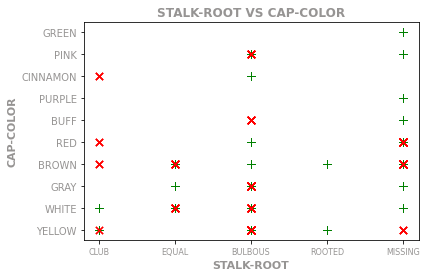

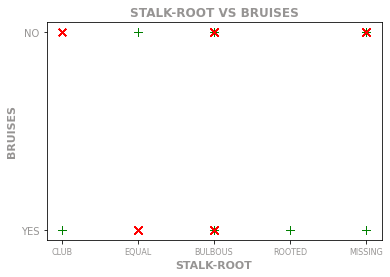

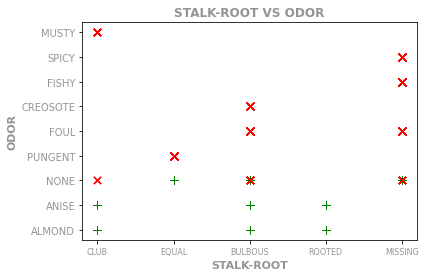

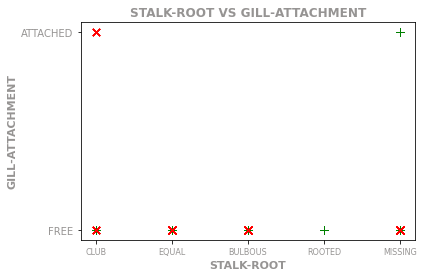

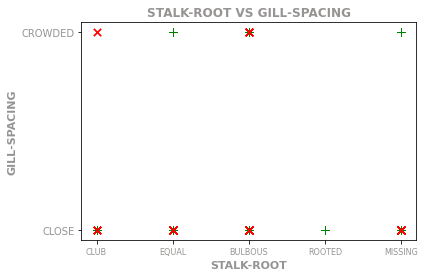

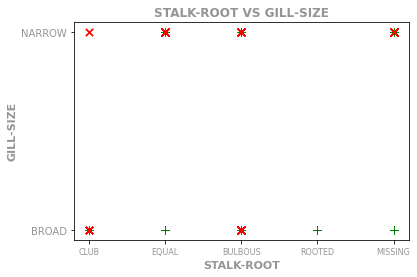

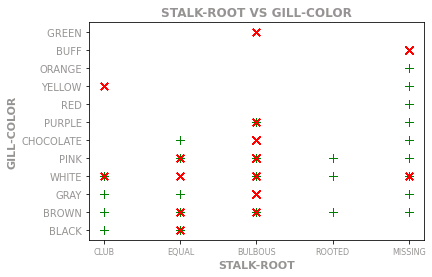

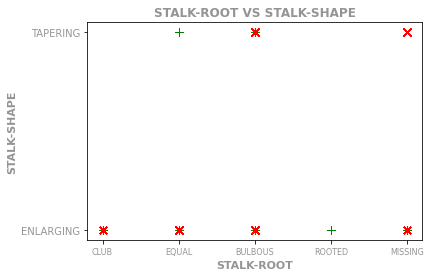

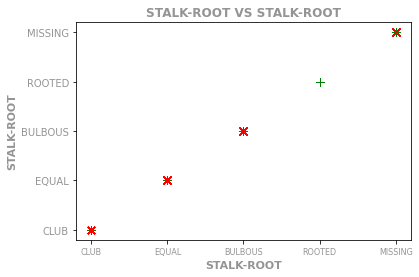

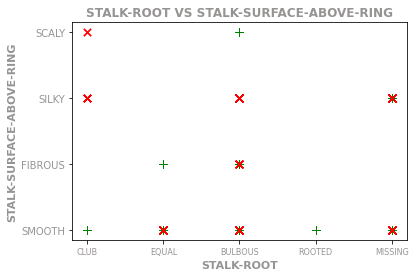

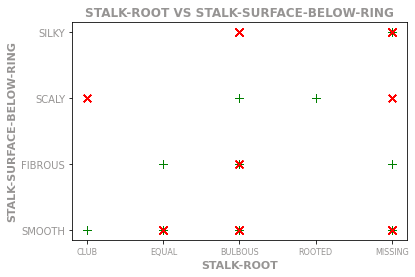

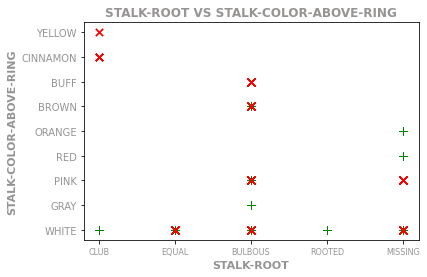

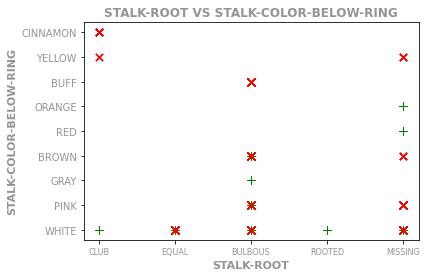

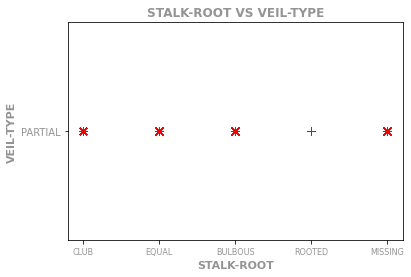

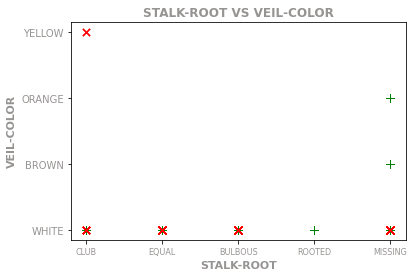

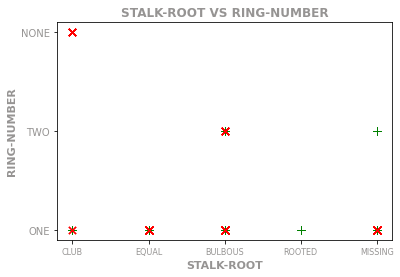

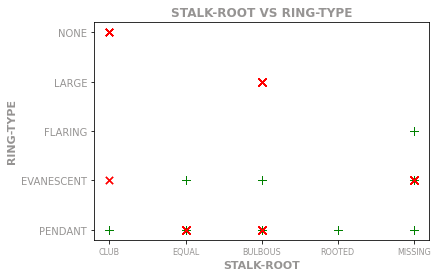

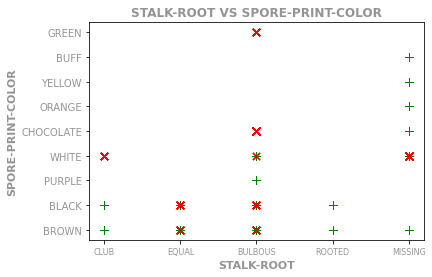

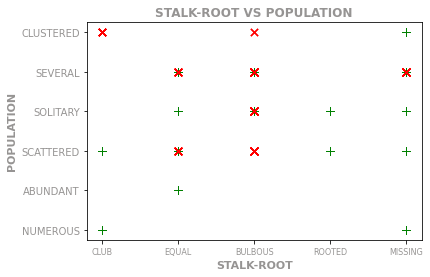

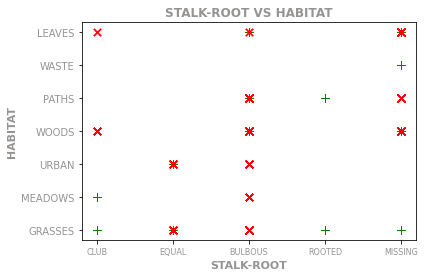

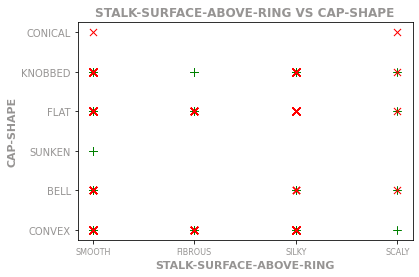

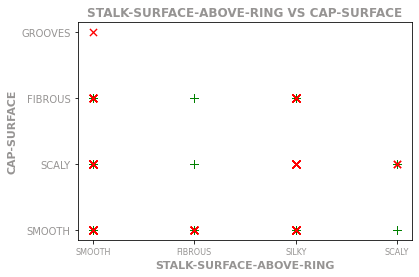

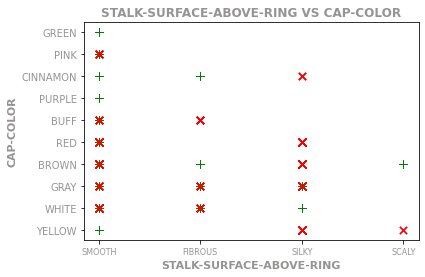

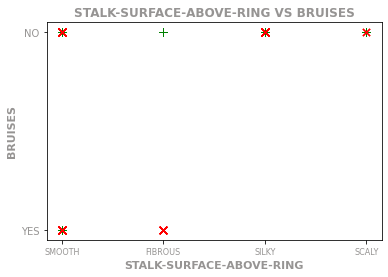

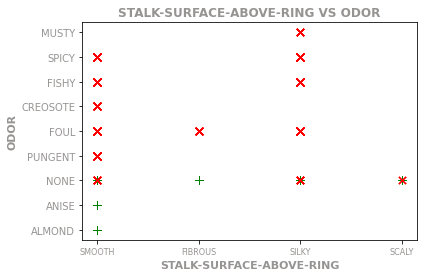

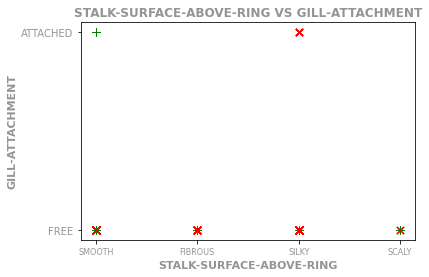

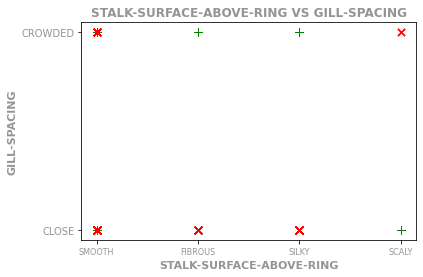

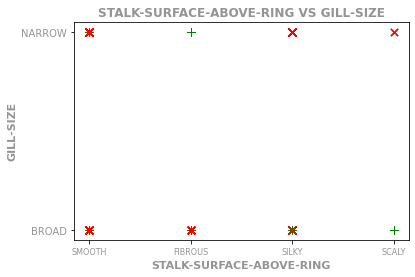

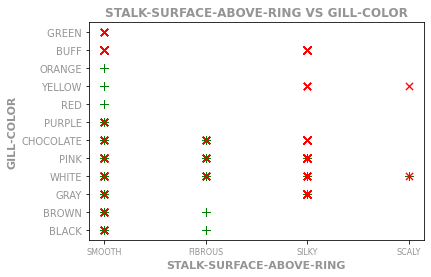

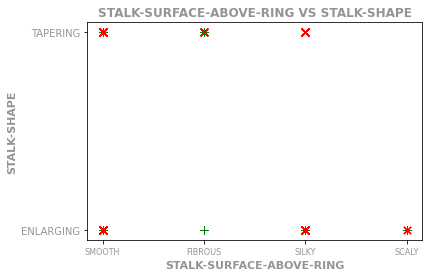

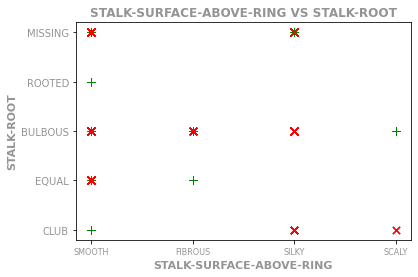

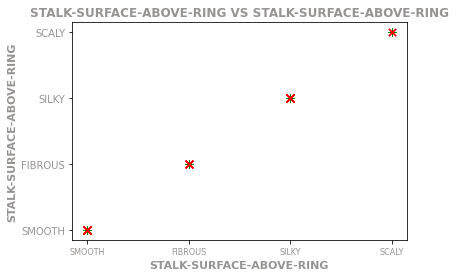

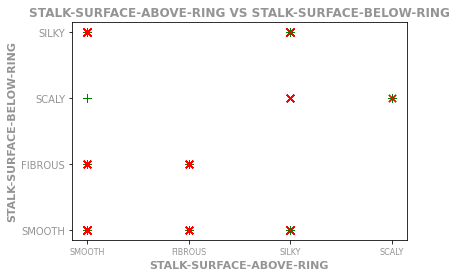

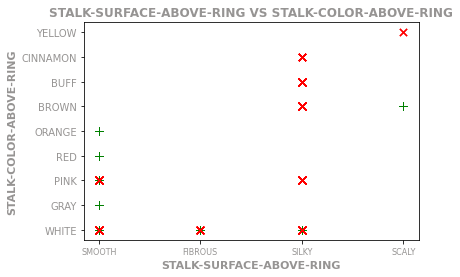

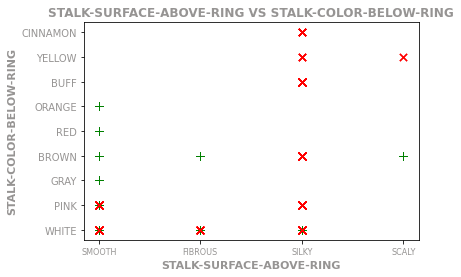

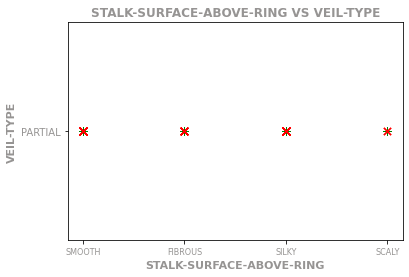

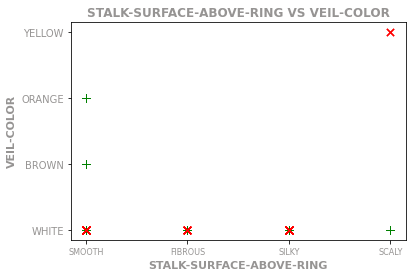

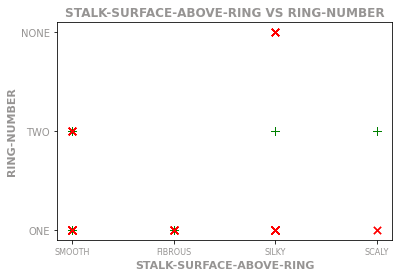

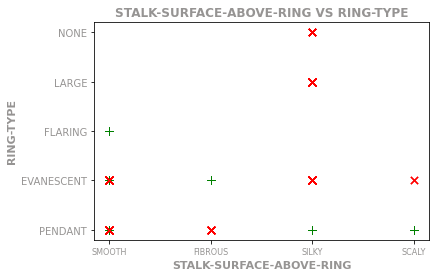

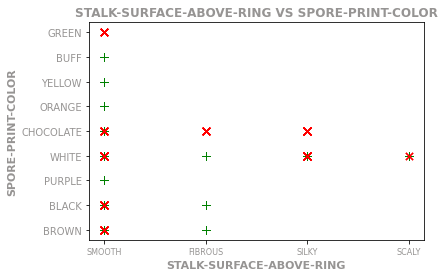

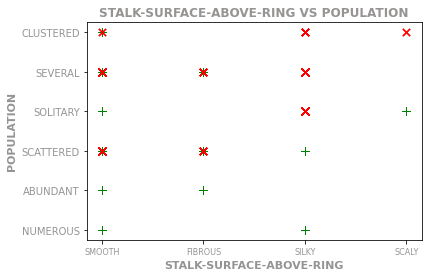

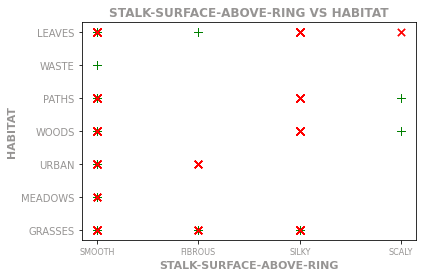

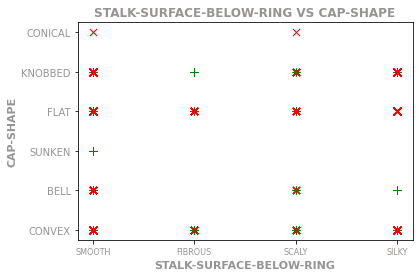

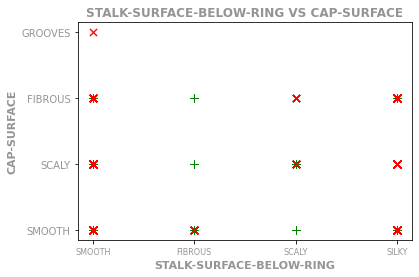

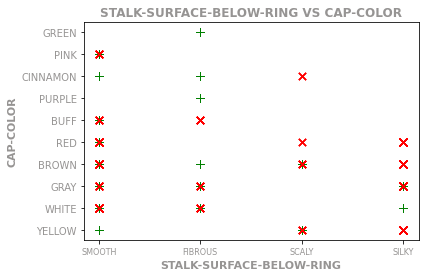

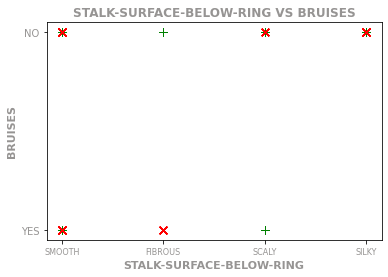

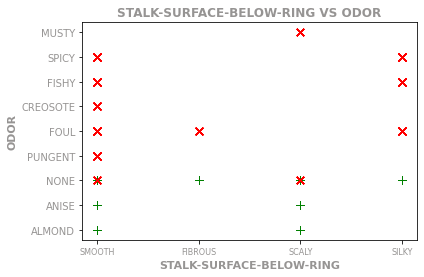

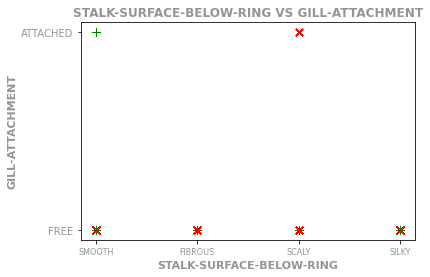

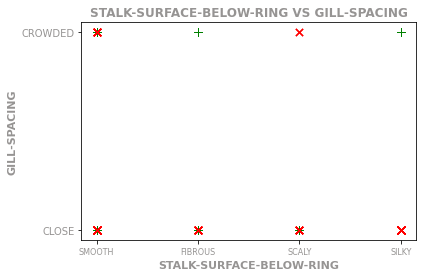

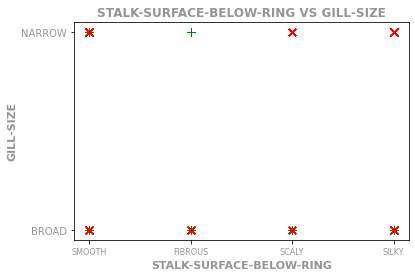

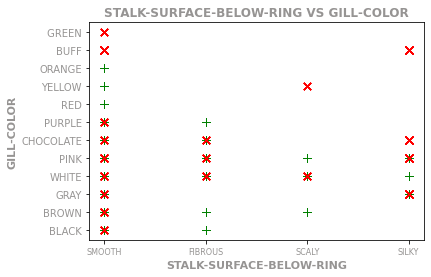

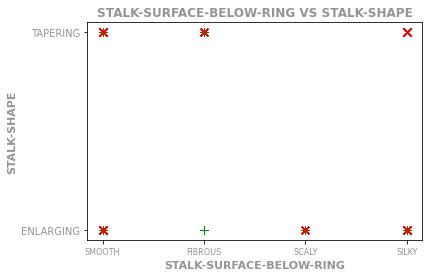

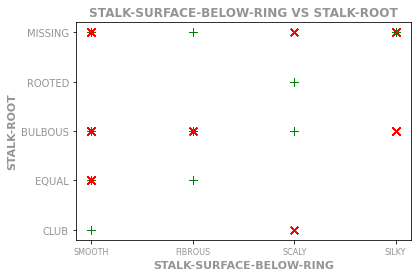

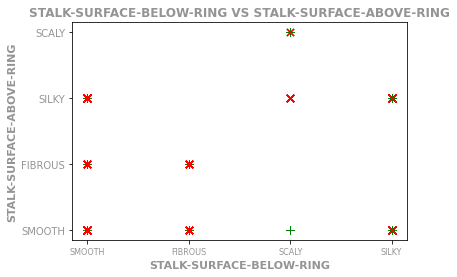

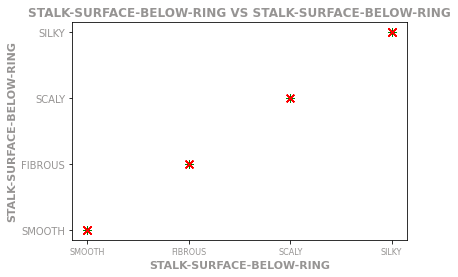

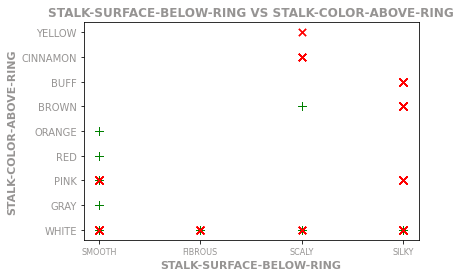

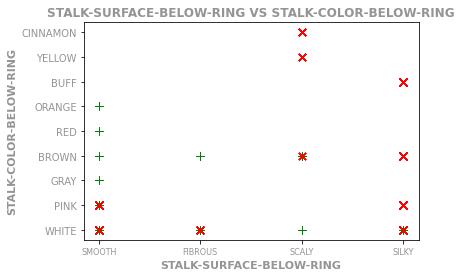

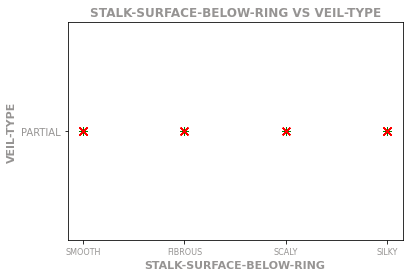

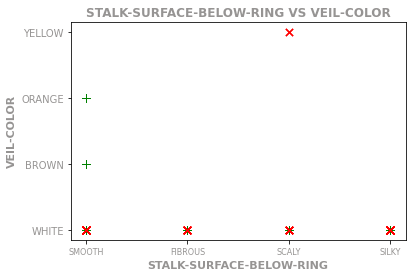

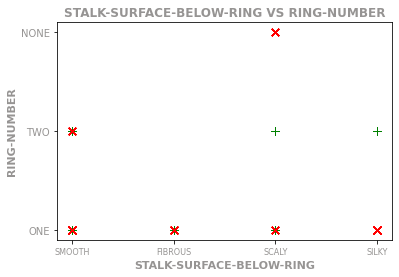

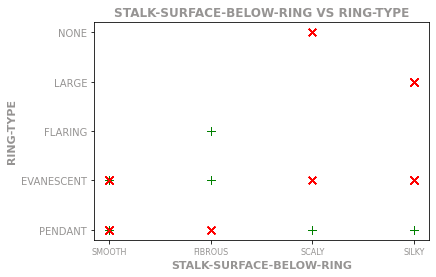

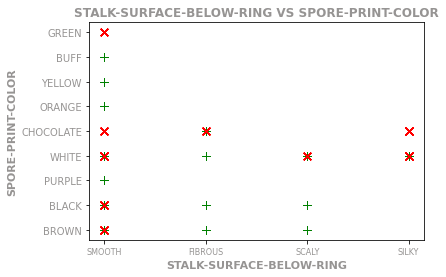

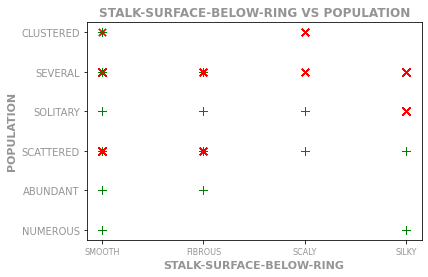

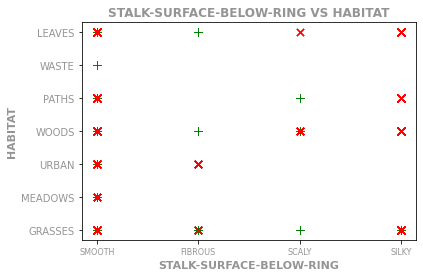

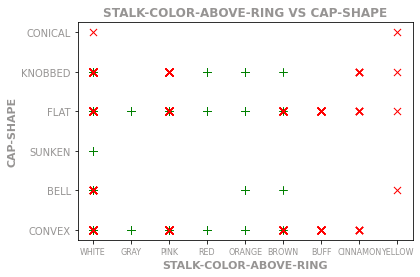

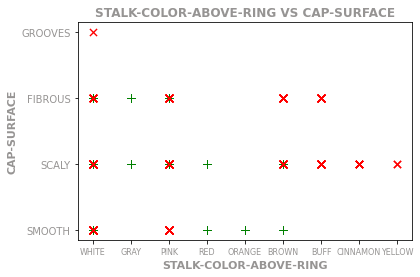

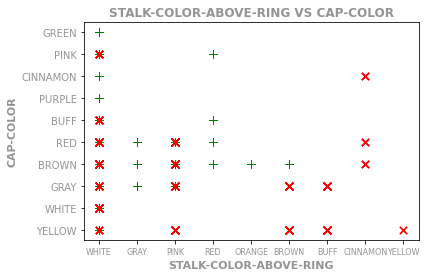

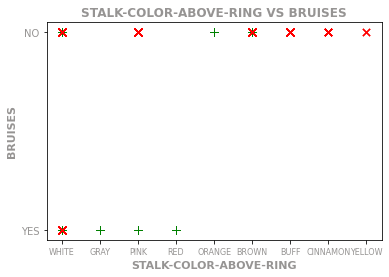

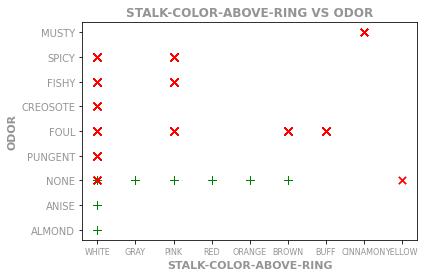

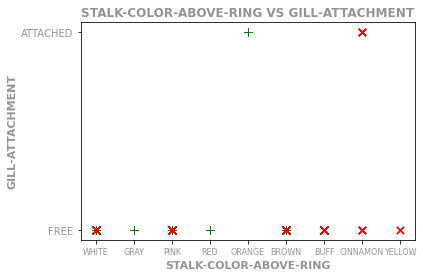

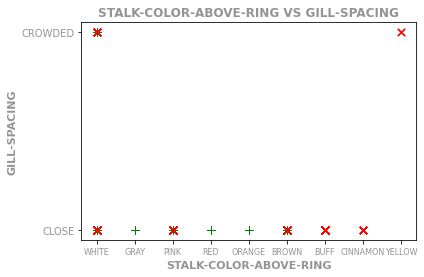

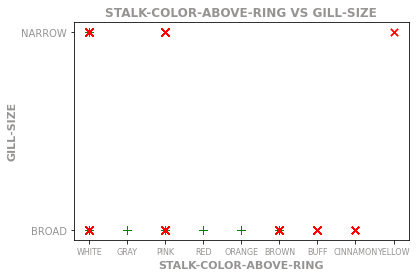

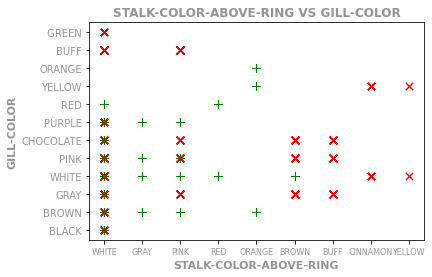

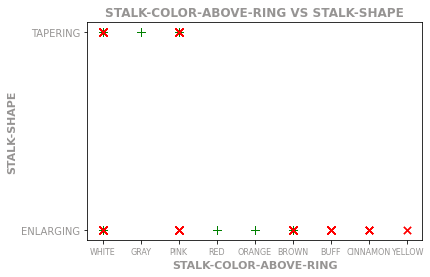

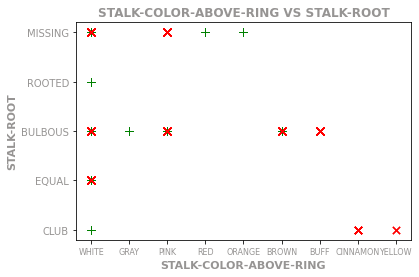

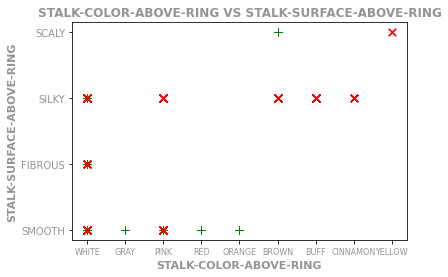

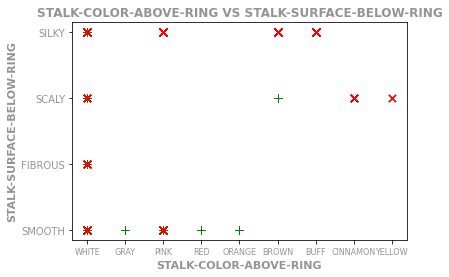

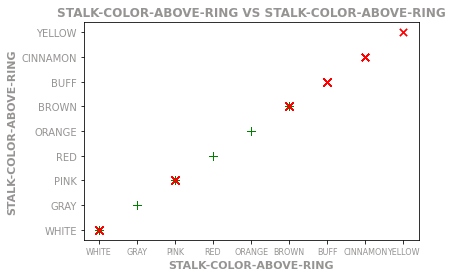

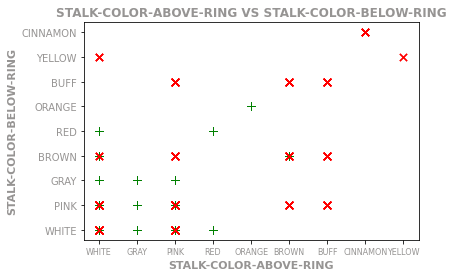

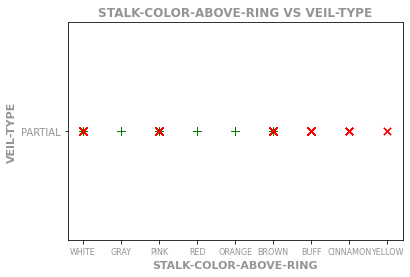

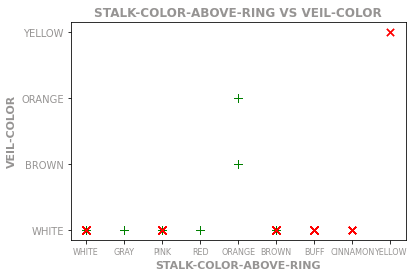

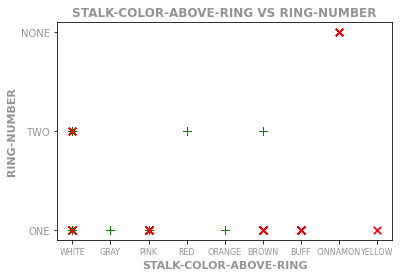

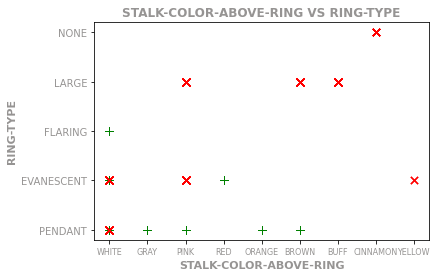

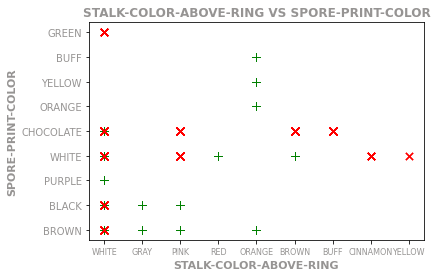

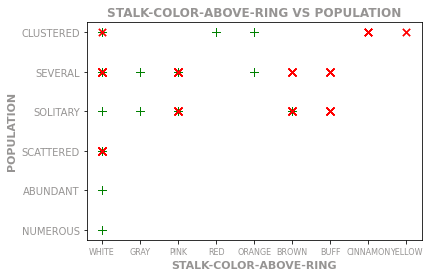

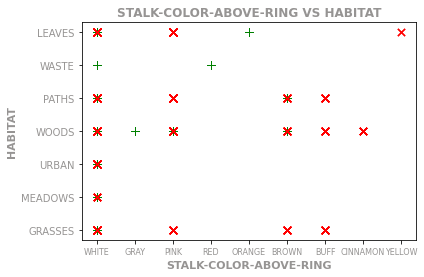

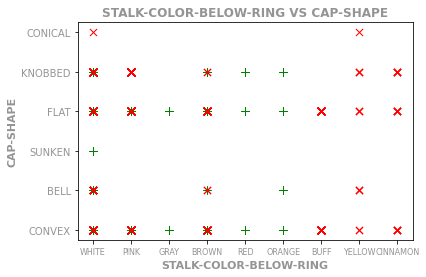

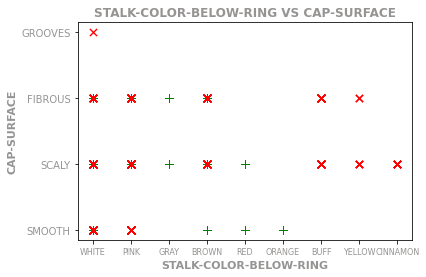

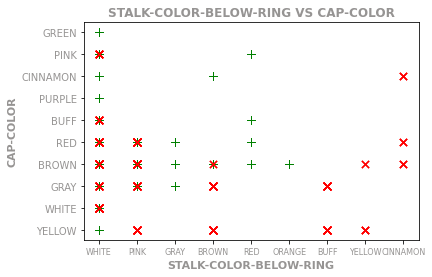

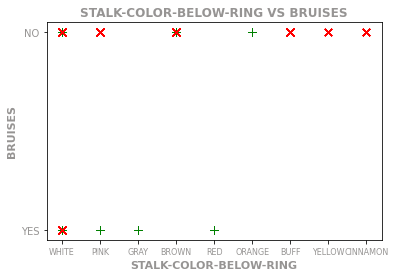

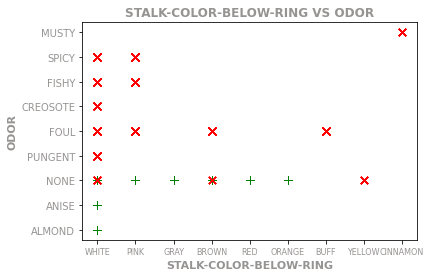

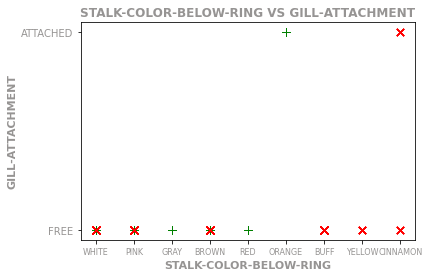

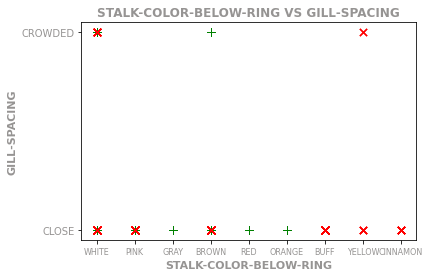

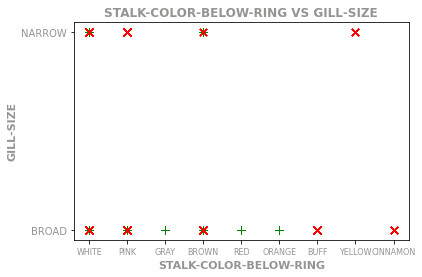

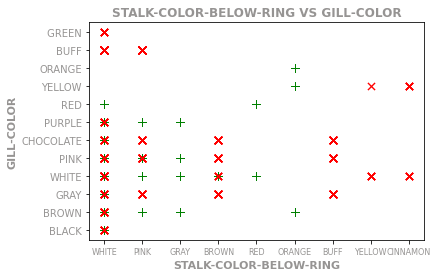

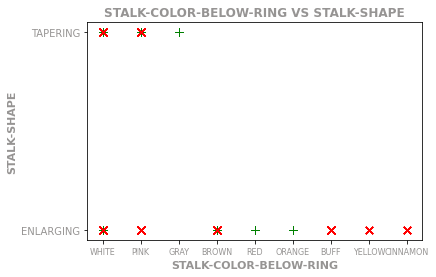

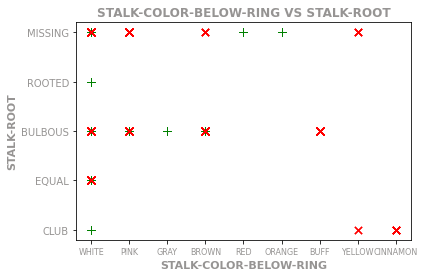

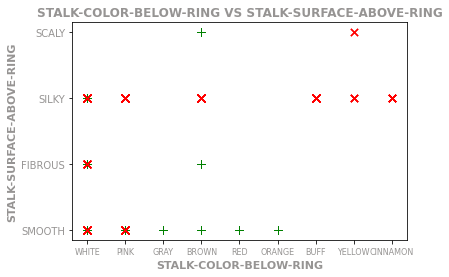

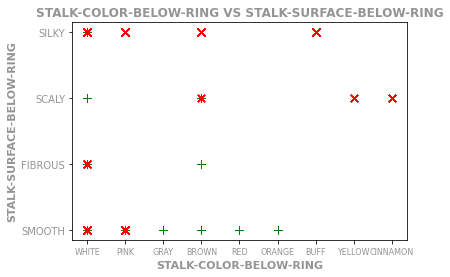

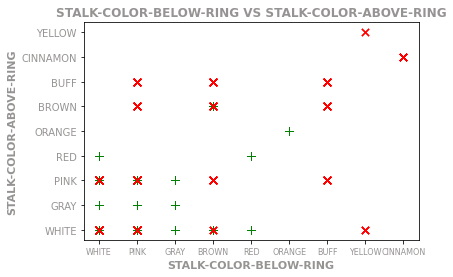

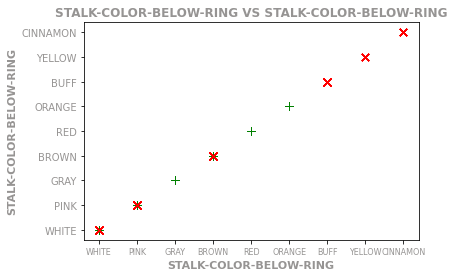

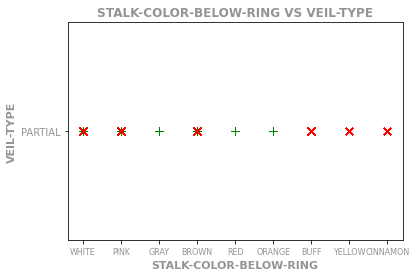

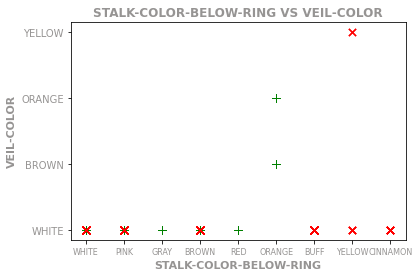

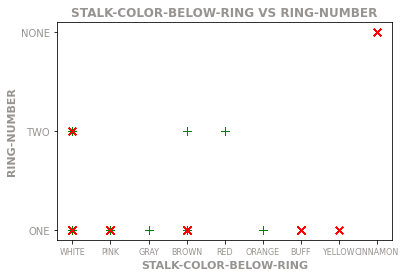

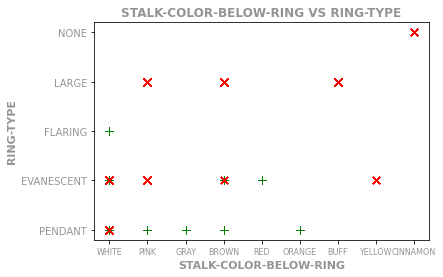

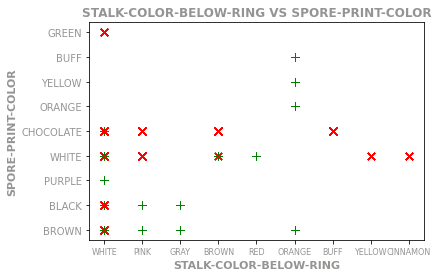

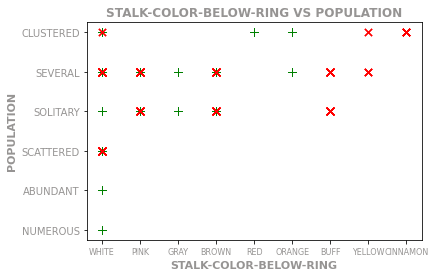

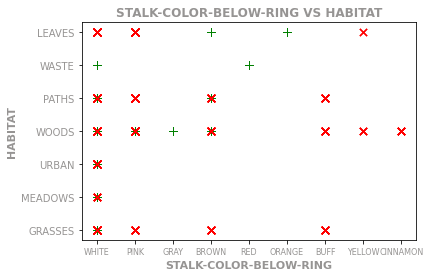

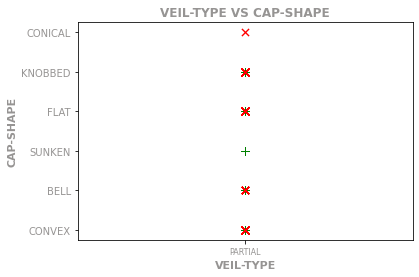

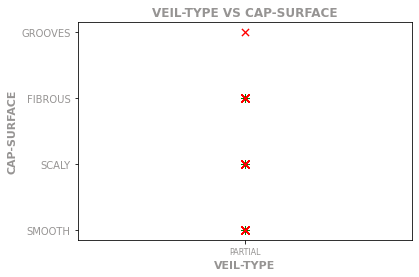

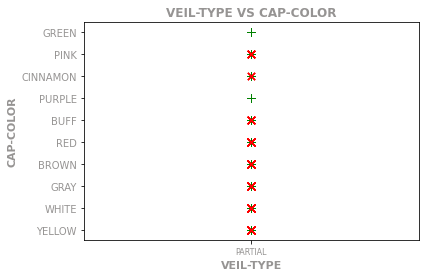

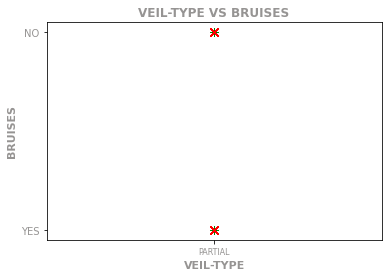

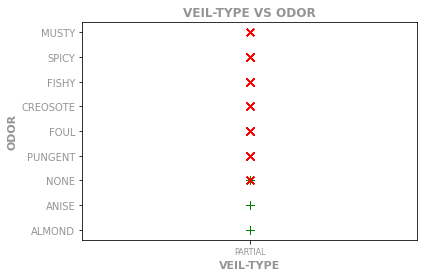

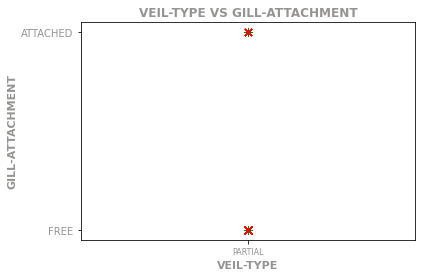

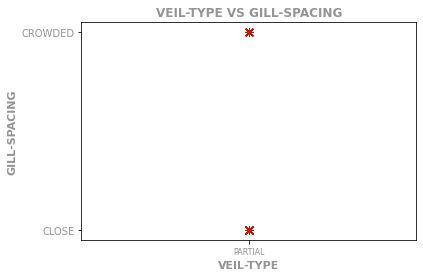

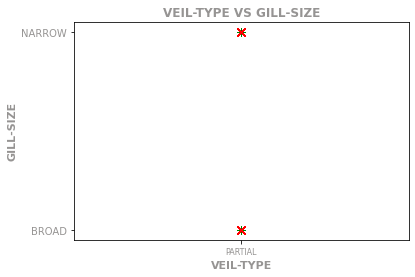

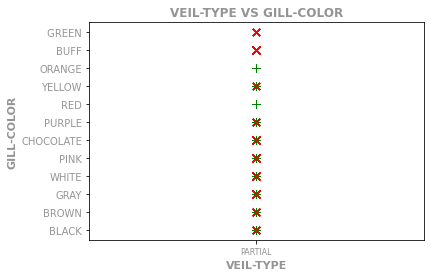

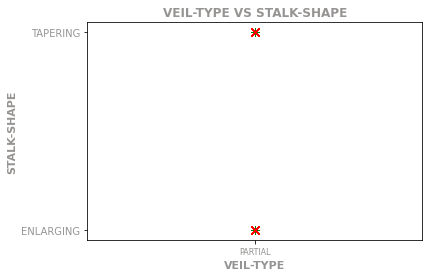

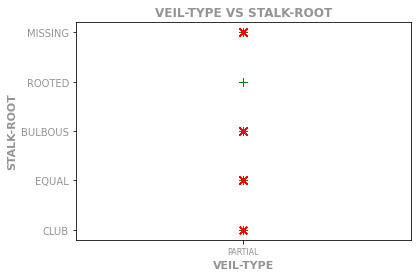

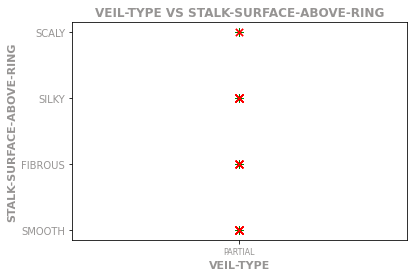

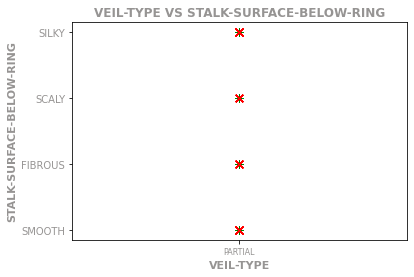

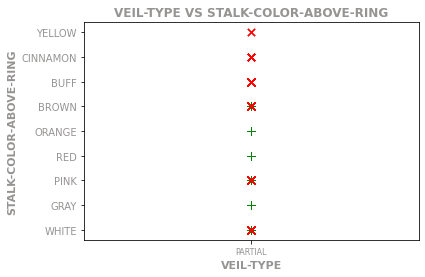

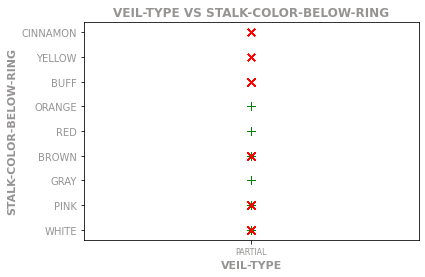

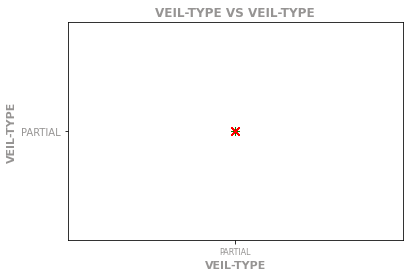

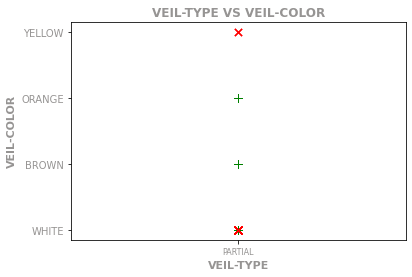

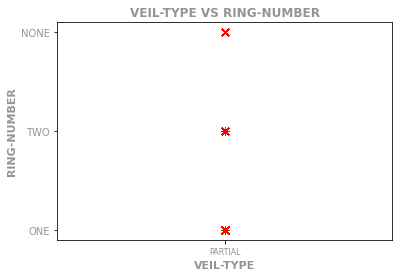

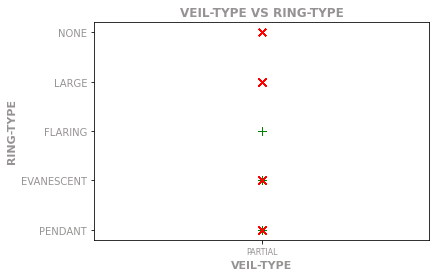

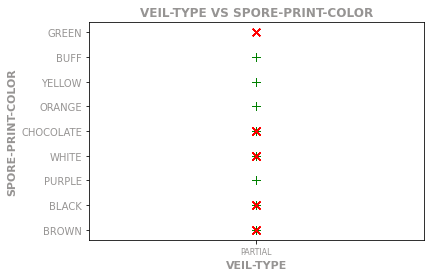

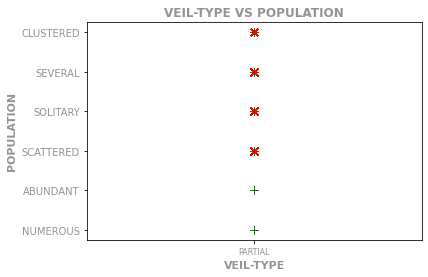

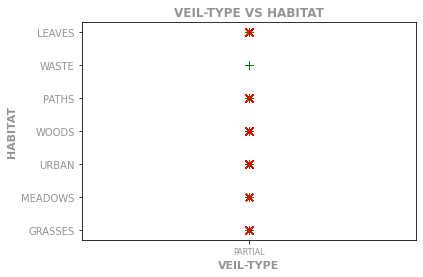

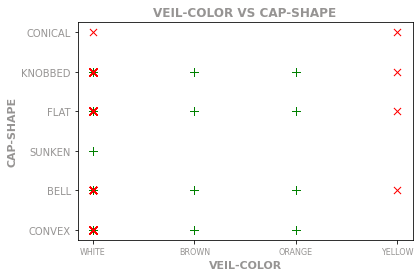

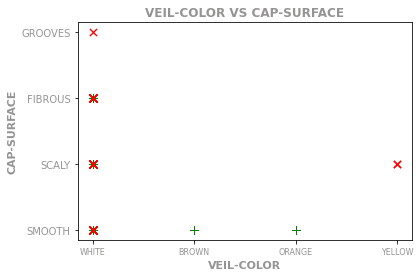

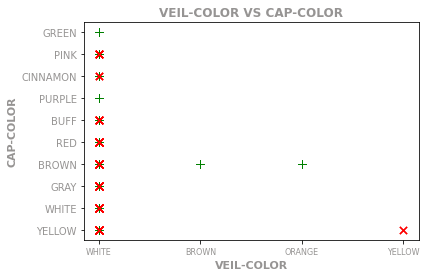

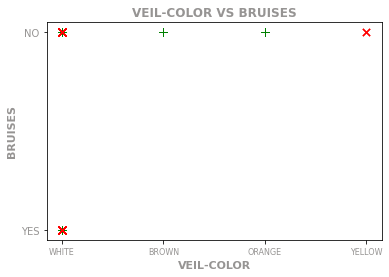

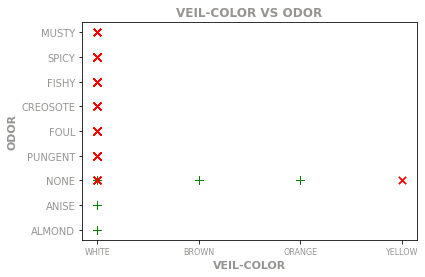

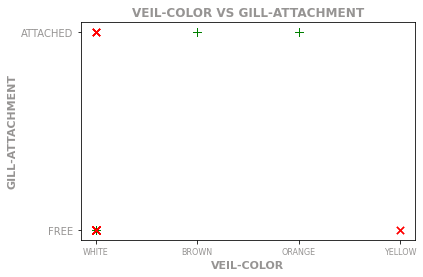

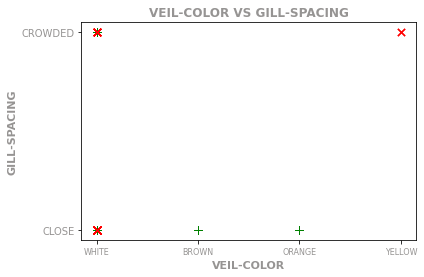

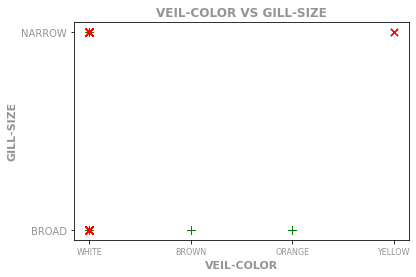

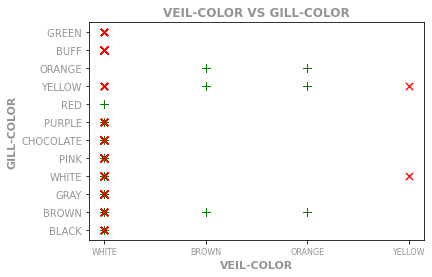

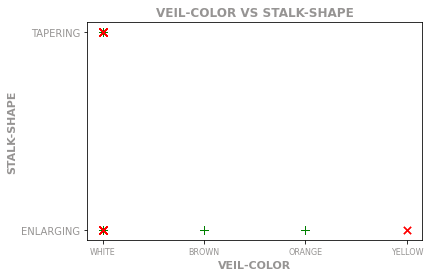

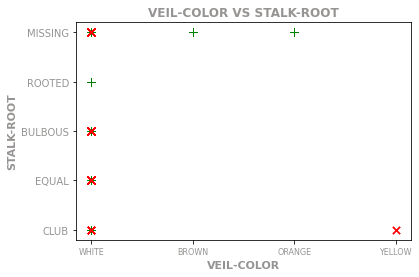

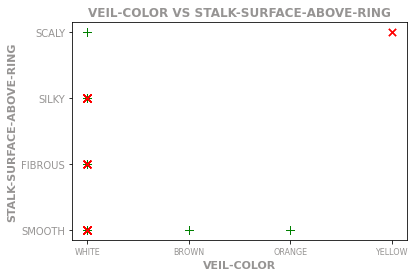

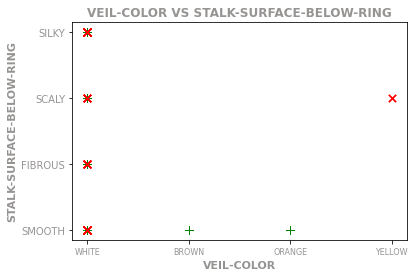

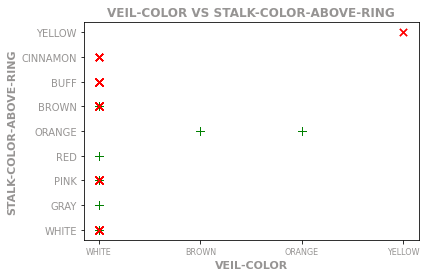

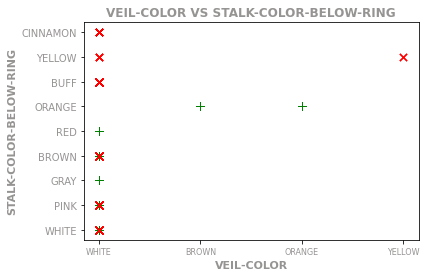

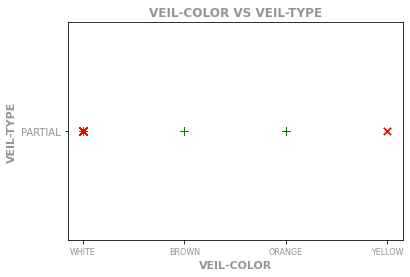

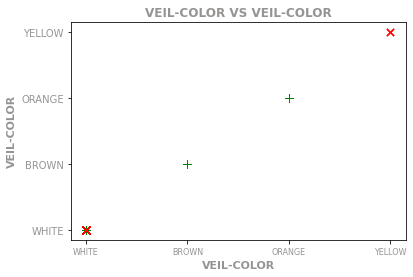

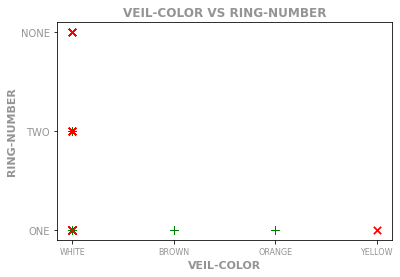

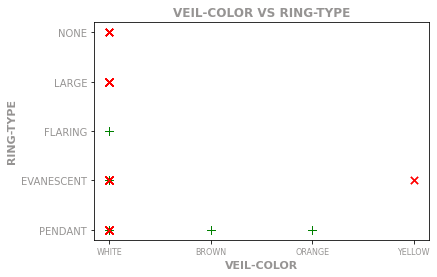

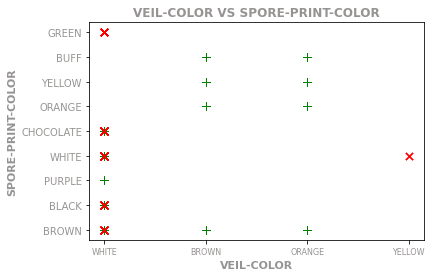

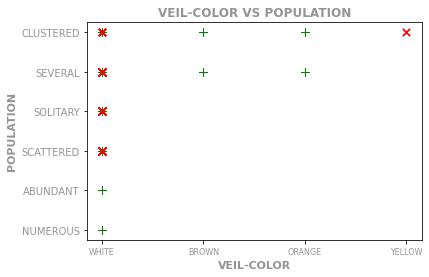

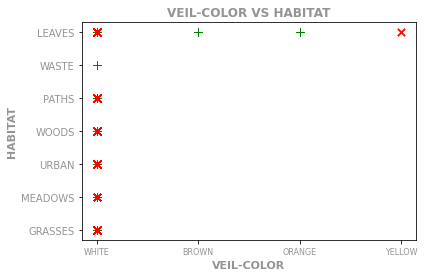

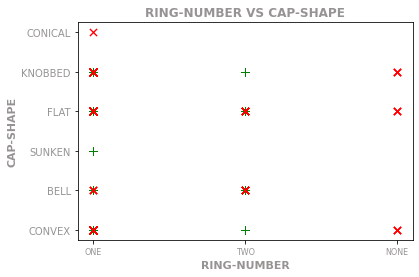

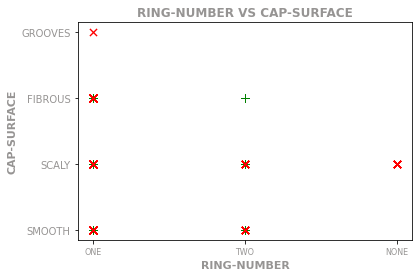

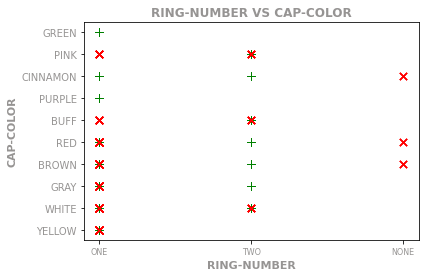

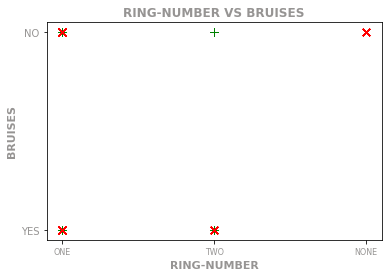

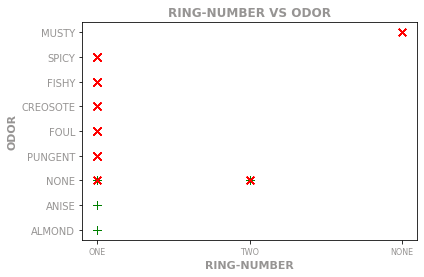

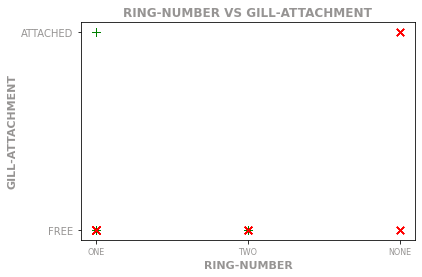

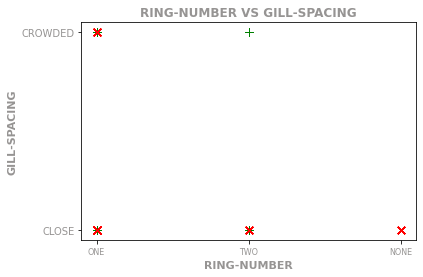

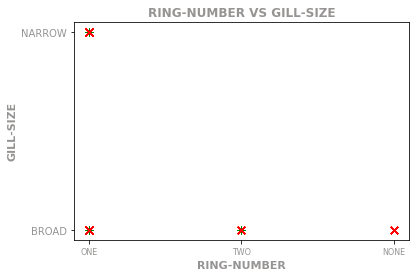

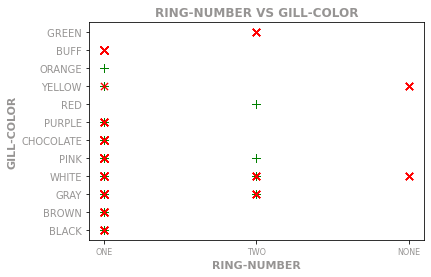

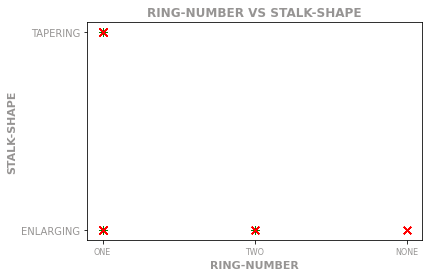

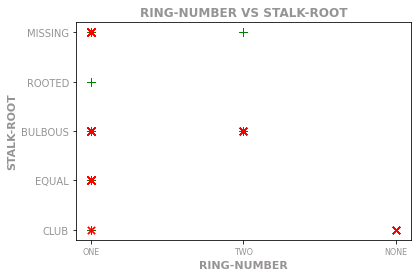

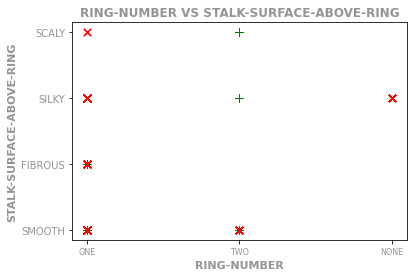

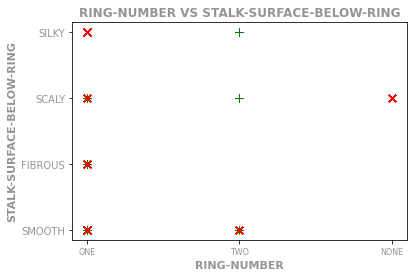

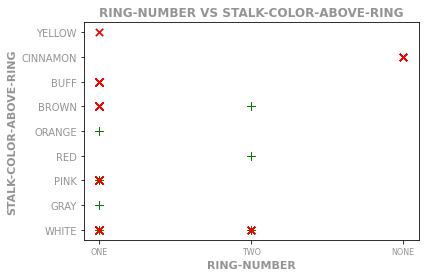

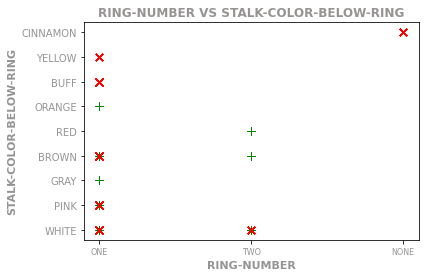

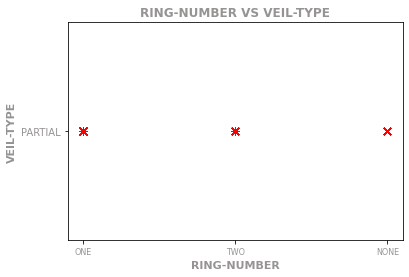

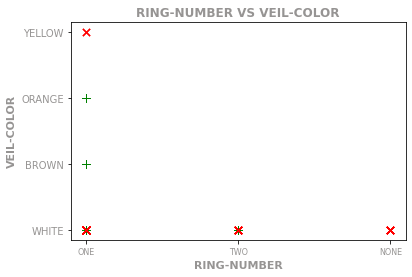

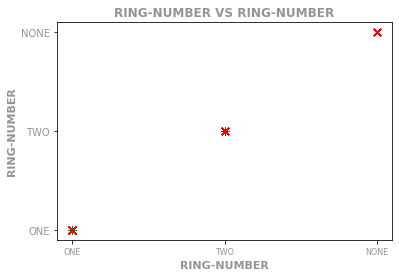

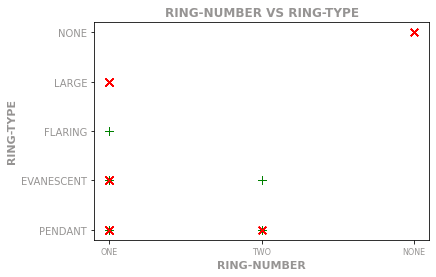

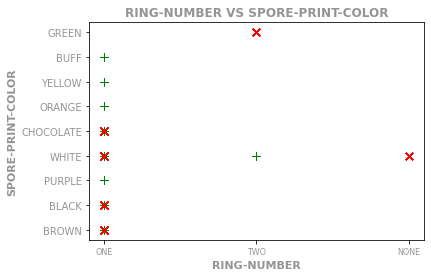

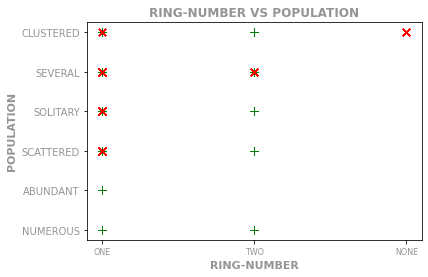

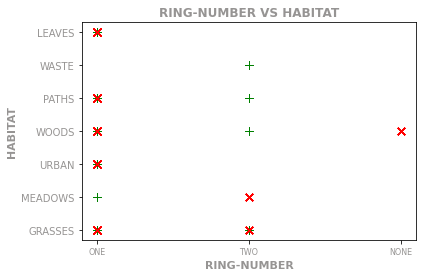

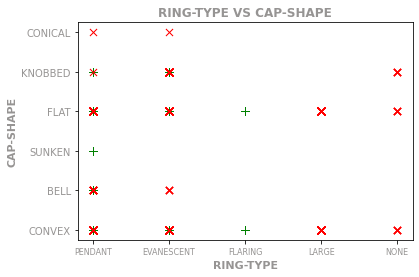

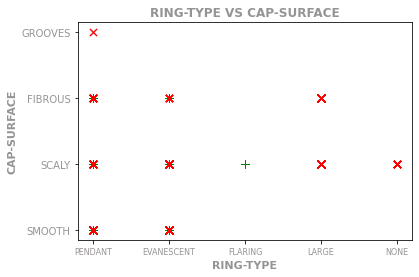

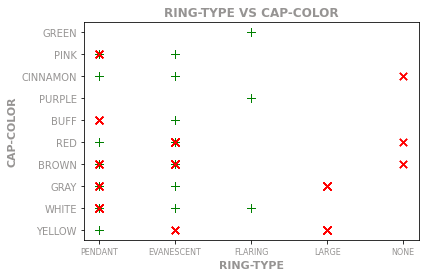

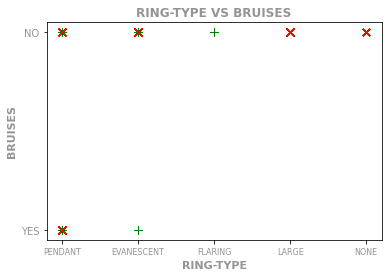

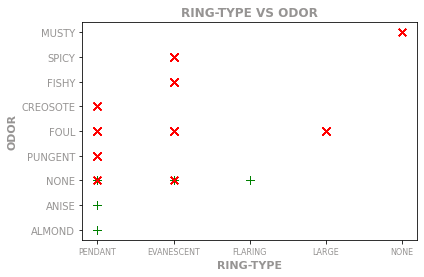

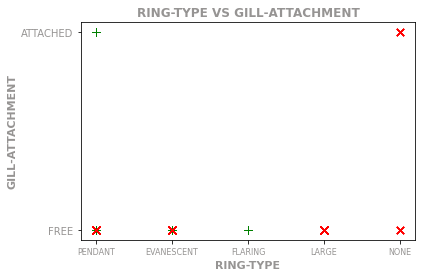

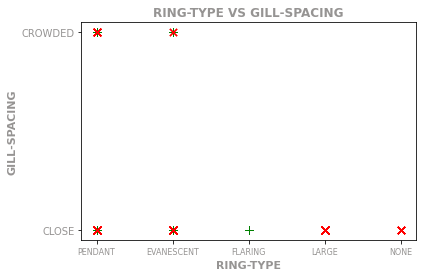

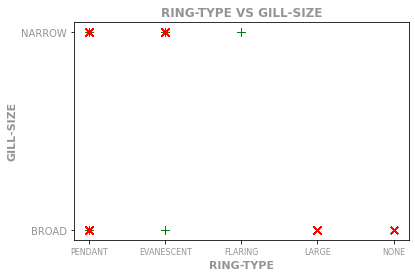

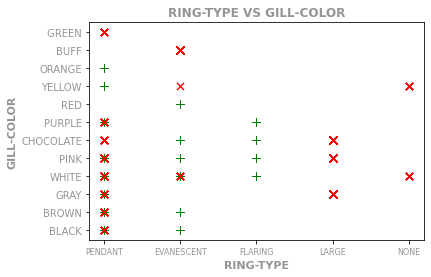

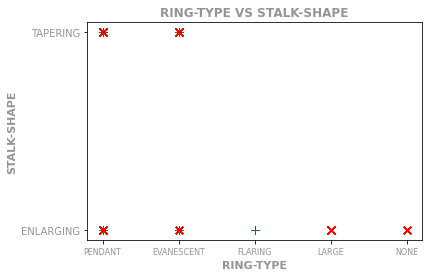

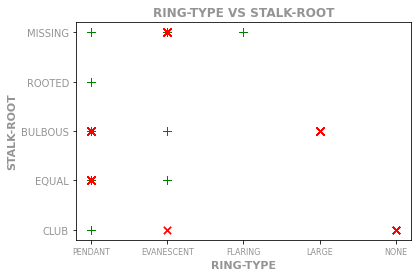

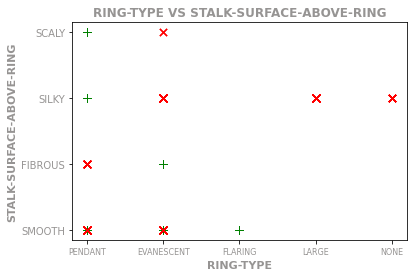

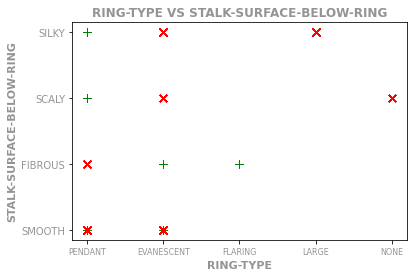

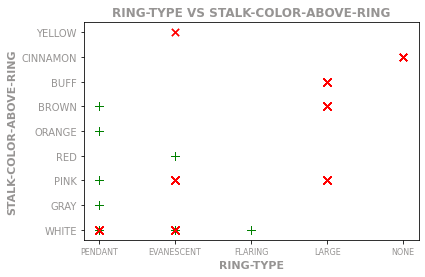

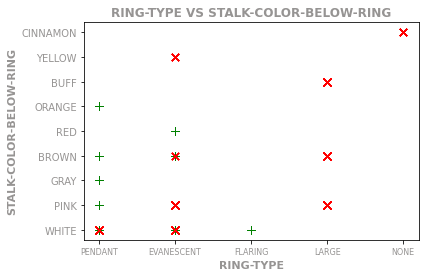

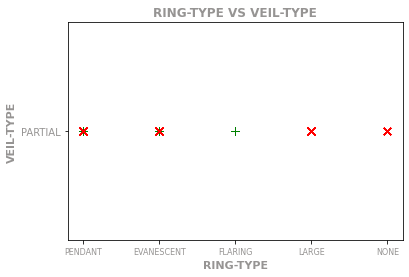

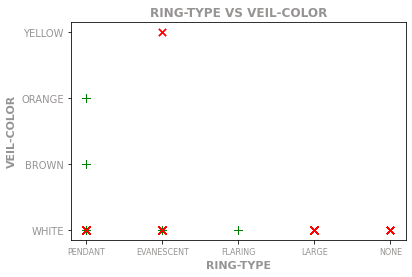

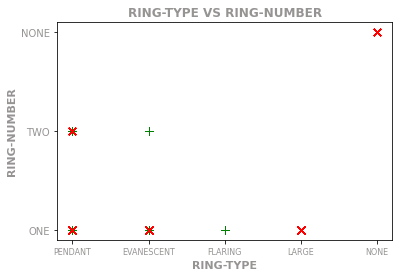

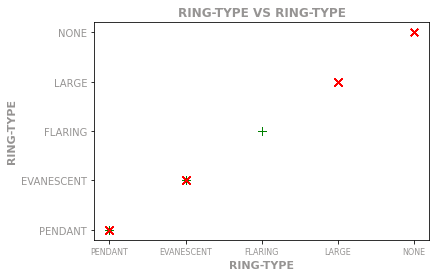

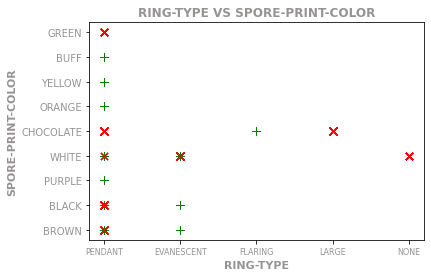

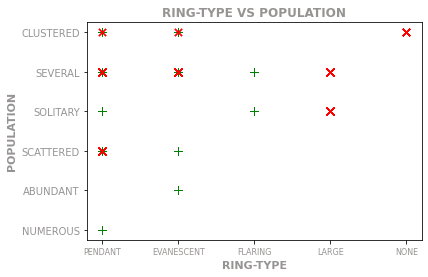

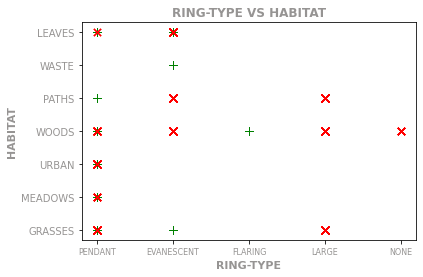

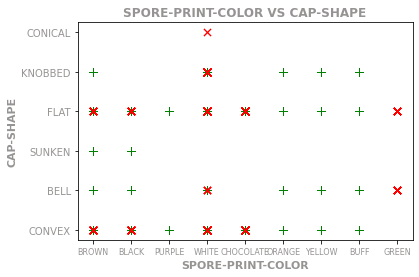

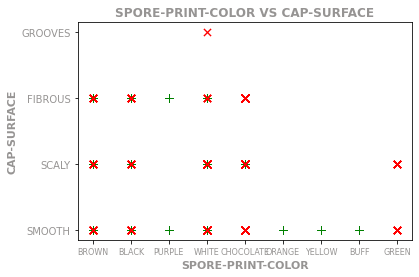

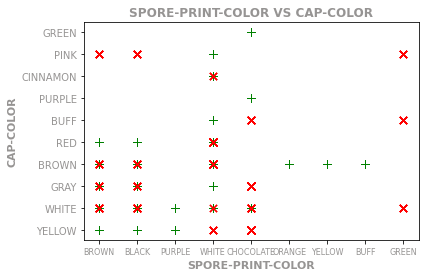

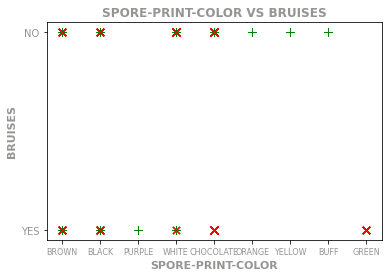

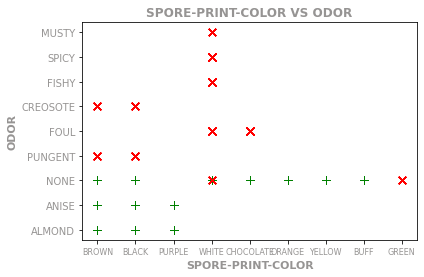

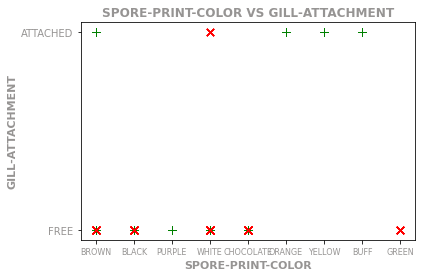

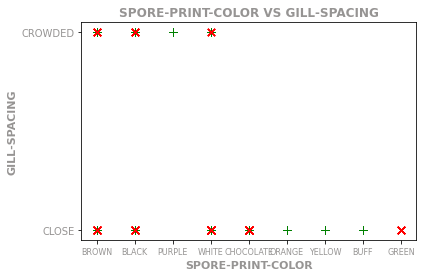

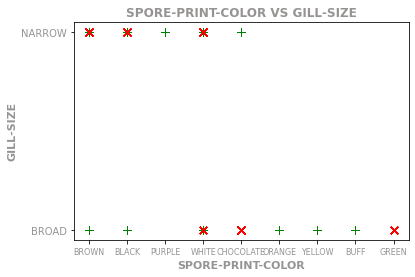

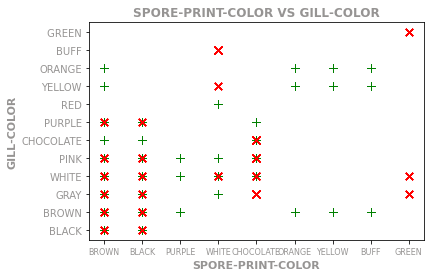

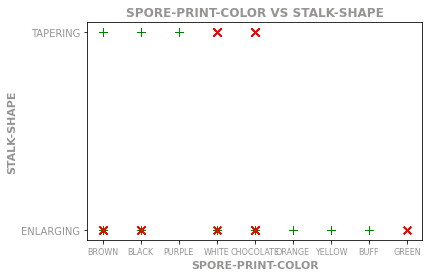

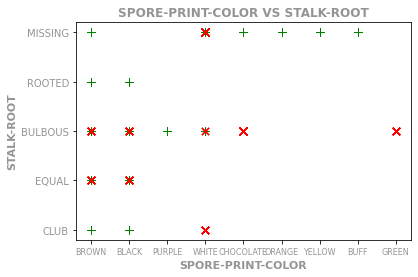

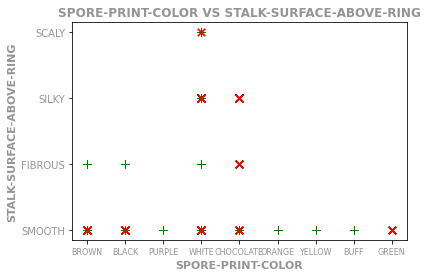

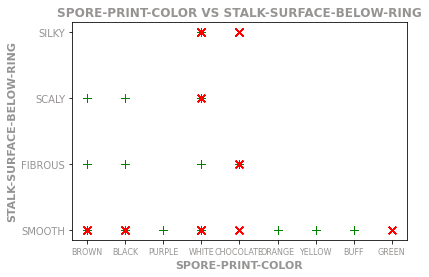

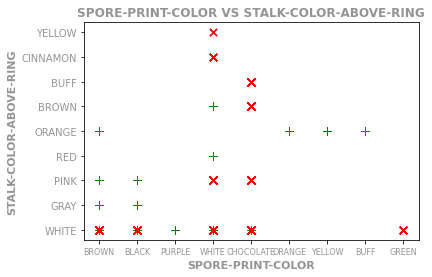

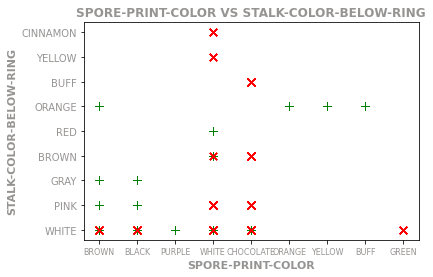

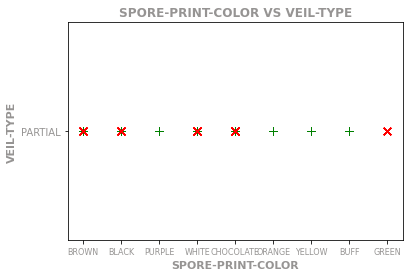

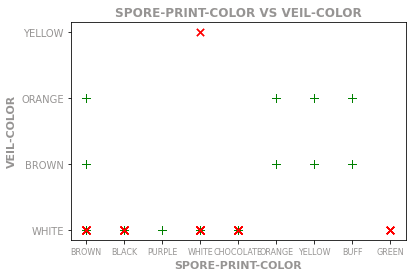

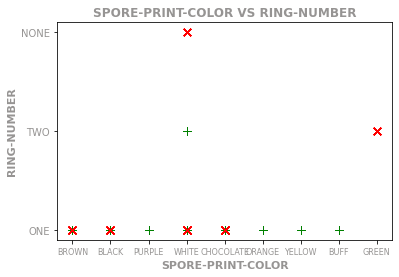

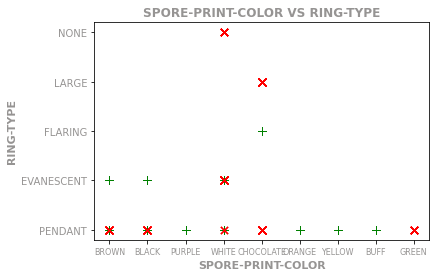

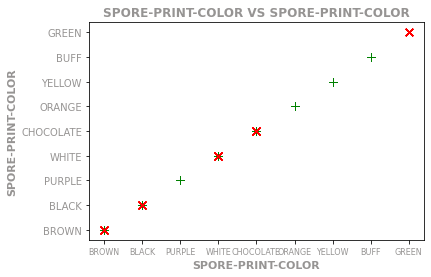

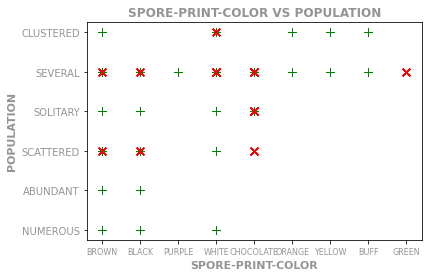

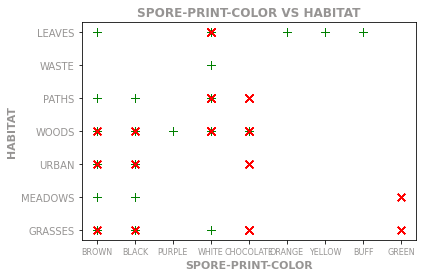

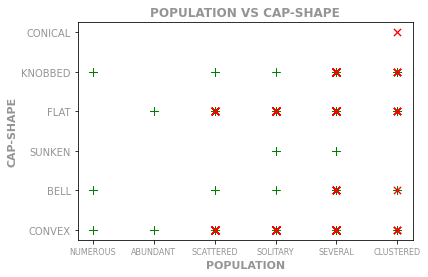

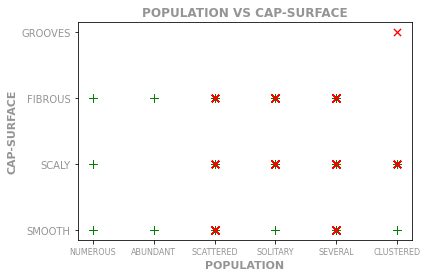

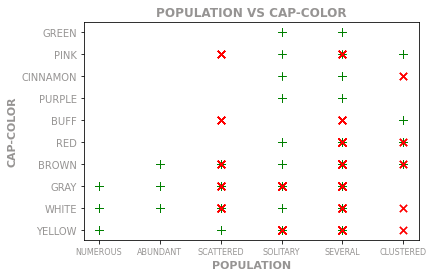

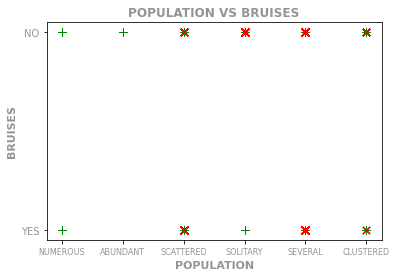

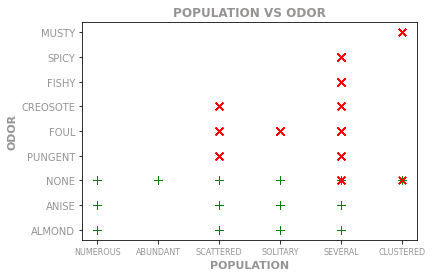

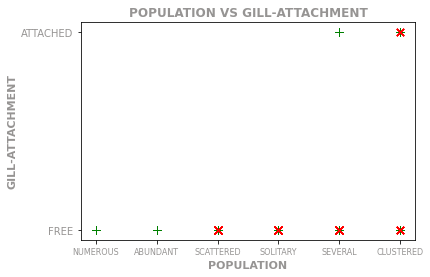

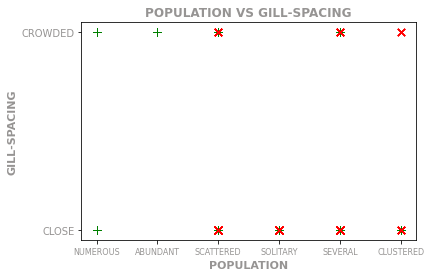

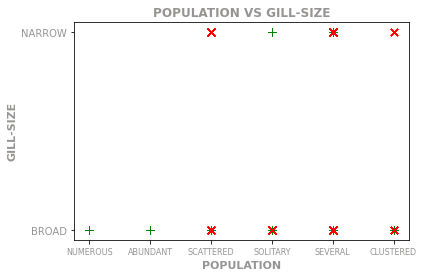

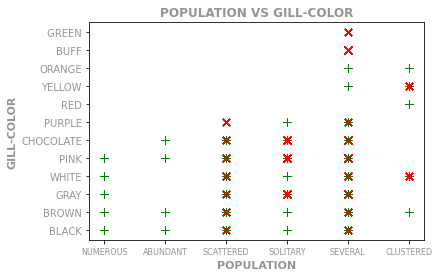

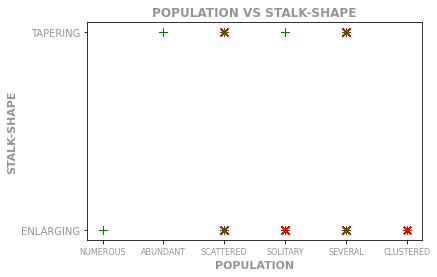

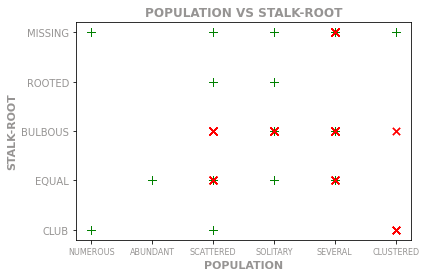

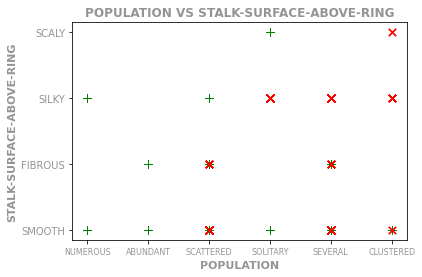

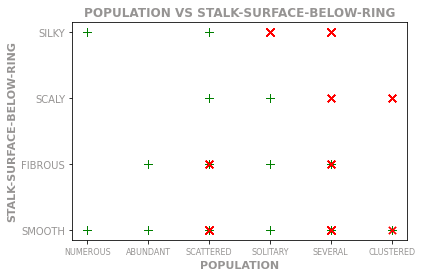

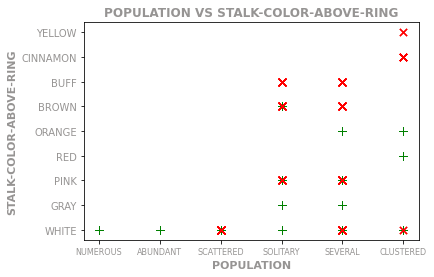

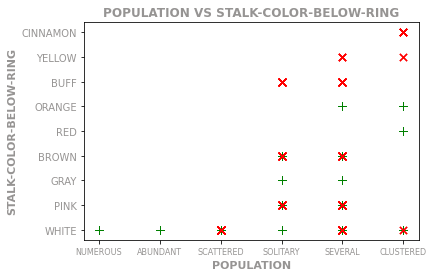

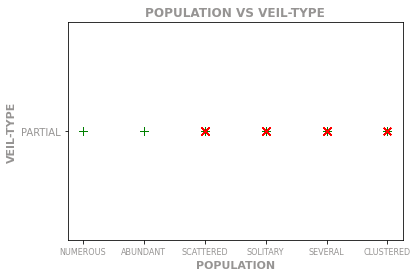

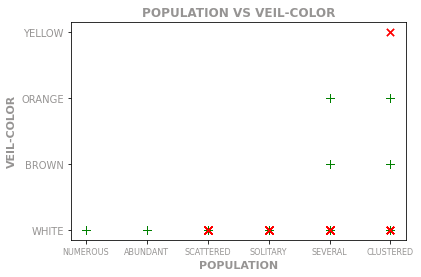

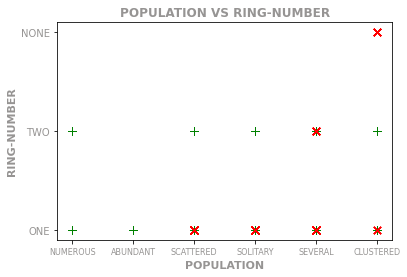

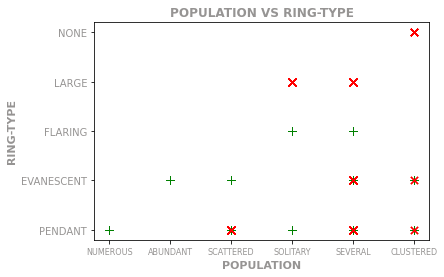

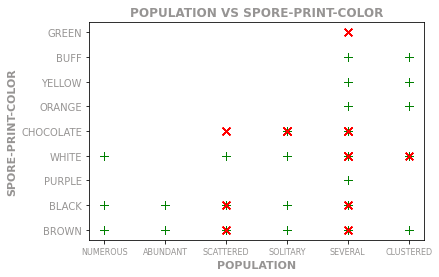

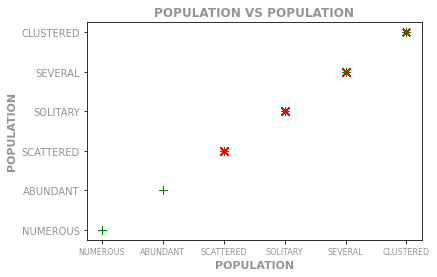

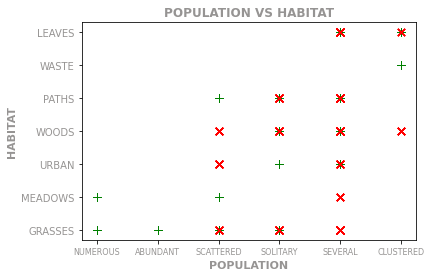

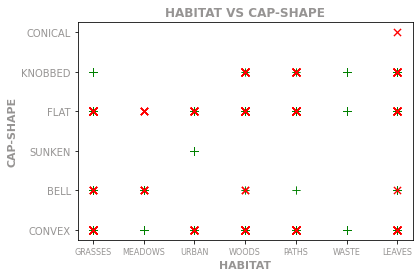

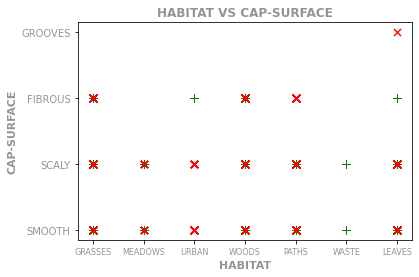

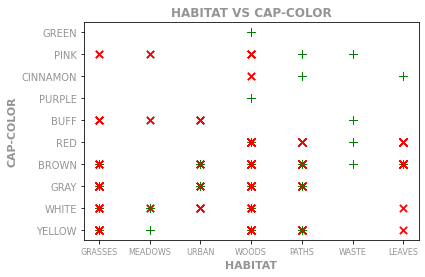

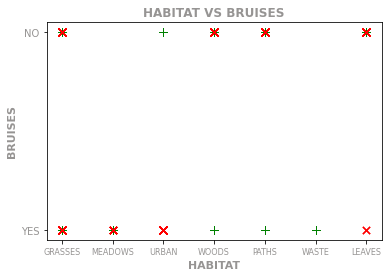

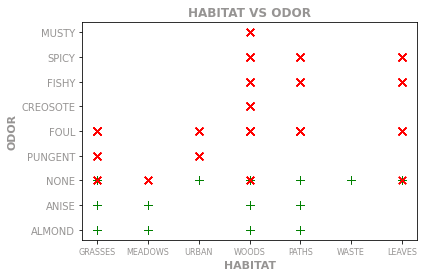

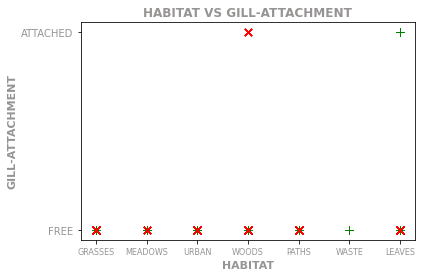

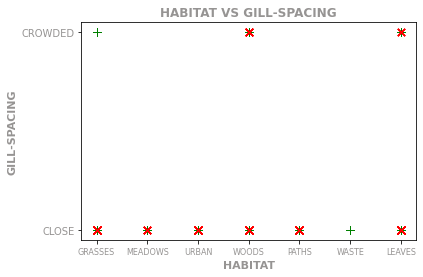

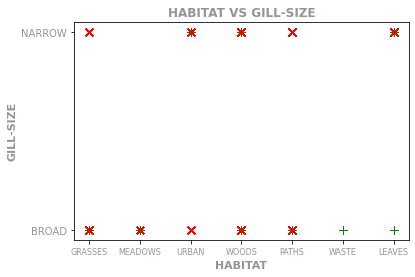

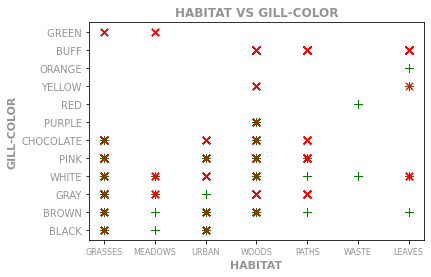

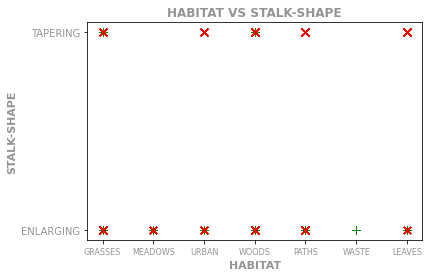

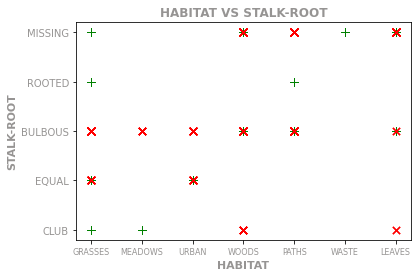

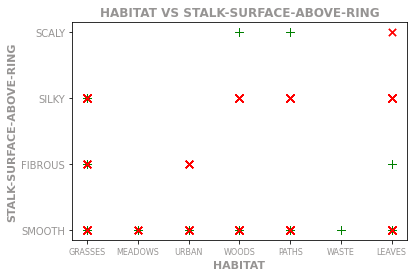

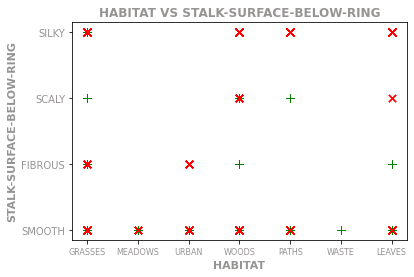

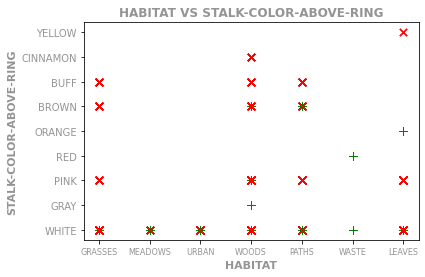

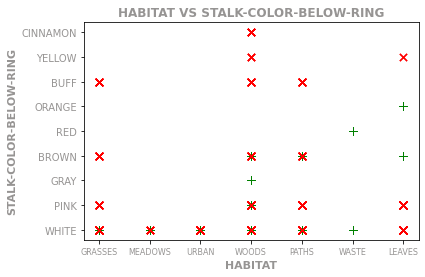

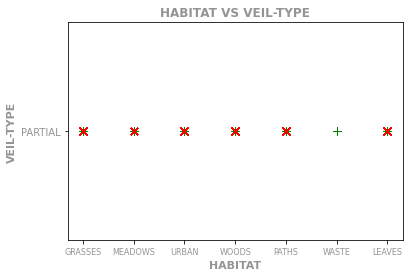

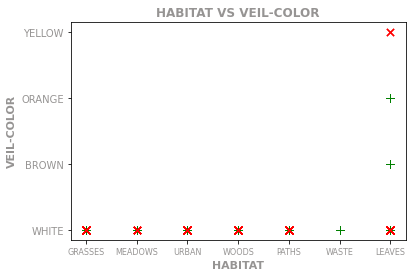

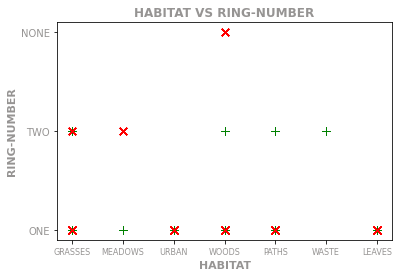

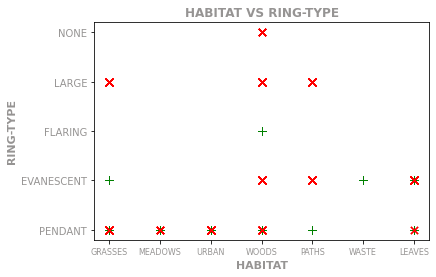

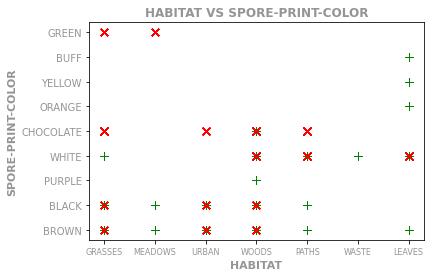

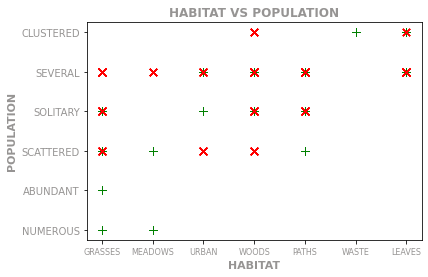

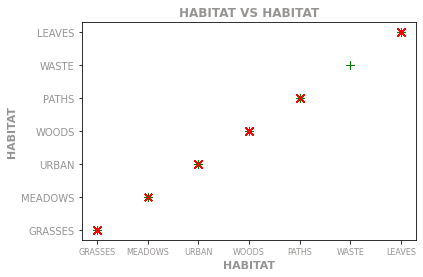

In [69]:
lst=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor','gill-attachment', 'gill-spacing', 'gill-size', 'gill-color','stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring','stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type', 'spore-print-color', 'population', 'habitat']
for i in lst:
    for j in lst:
        plt.figure()
        sns.scatterplot(df[i][df.CLASS=="EDIBLE"], df[j][df.CLASS=="EDIBLE"], color='green', marker='+', s=50)
        sns.scatterplot(df[i][df.CLASS=="POISONOUS"], df[j][df.CLASS=="POISONOUS"], color='red', marker='x', s=50)
        plt.title(i.upper()+' VS '+ j.upper(), fontweight='bold', fontsize=12, color='#969493')
        plt.xticks(fontsize=8, color='#969493')
        plt.yticks(color='#969493')
        plt.xlabel(i.upper(), fontweight='bold', fontsize=11, color='#969493')
        plt.ylabel(j.upper(), fontweight='bold', fontsize=11, color='#969493')
        plt.show()

# 4. Handling Missing Values

In [16]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [17]:
data.loc[data['stalk-root']=='?'].index

Int64Index([3984, 4023, 4076, 4100, 4104, 4196, 4200, 4283, 4291, 4326,
            ...
            8113, 8115, 8116, 8117, 8118, 8119, 8120, 8121, 8122, 8123],
           dtype='int64', length=2480)

In [18]:
print ('missing value percentage is :',2480/8142*100)

missing value percentage is : 30.4593465978875


#### Here more than 20% data missing. Therefore, this needs to be dropped.

In [19]:
data.drop('stalk-root', axis=1, inplace=True)

In [20]:
data.shape

(8124, 22)

# 5. Feature Engineering

In [21]:
data.drop('veil-type', axis=1, inplace=True)

In [22]:
data.shape

(8124, 21)

#### Here veiltype is removed since it contains only one value

# 6. Encoding Categorical data

#### Here Mapping is used for nominal data

In [23]:
data['class']=data['class'].map({'p':0, 'e':1})
data['cap-shape']=data['cap-shape'].map({'b':1, 'c':2, 'x':3, 'f':4, 'k':5, 's':6})
data['cap-surface']=data['cap-surface'].map({'f':1, 'g':2, 'y':3, 's':4})
data['cap-color']=data['cap-color'].map({'n':1, 'b':2, 'c':3, 'g':4, 'r':5, 'p':6, 'u':7,'e':8, 'w':9, 'y':10})
data['bruises']=data['bruises'].map({'t':1, 'f':0})
data['odor']=data['odor'].map({'a':1, 'l':2, 'c':3, 'y':4, 'f':5, 'm':6, 'n':7, 'p':8, 's':9})
data['gill-attachment']=data['gill-attachment'].map({'a':1, 'd':2, 'f':3, 'n':4})
data['gill-spacing']=data['gill-spacing'].map({'c':1, 'w':2})
data['gill-size']=data['gill-size'].map({'n':1, 'b':2})
data['gill-color']=data['gill-color'].map({'k':1, 'n':2, 'g':3, 'p':4, 'w':5, 'h':6, 'u':7, 'e':8, 'b':9, 'r':10, 'y':11, 'o':12})
data['stalk-shape']=data['stalk-shape'].map({'e':1, 't':2})
data['stalk-surface-above-ring']=data['stalk-surface-above-ring'].map({'s':1, 'f':2, 'k':3, 'y':4})
data['stalk-surface-below-ring']=data['stalk-surface-below-ring'].map({'s':1, 'f':2, 'y':4, 'k':3})
data['stalk-color-above-ring']=data['stalk-color-above-ring'].map({'w':1, 'g':2, 'p':3, 'n':4, 'b':5, 'e':6, 'o':7, 'c':8, 'y':9})
data['stalk-color-below-ring']=data['stalk-color-below-ring'].map({'w':1, 'p':2, 'g':3, 'b':4, 'n':5, 'e':6, 'y':7, 'o':8, 'c':9})
data['veil-color']=data['veil-color'].map({'w':1, 'n':2, 'o':3, 'y':4})
data['ring-number']=data['ring-number'].map({'o':1, 't':2, 'n':3})
data['ring-type']=data['ring-type'].map({'p':1, 'e':2, 'l':3, 'f':4, 'n':5})
data['spore-print-color']=data['spore-print-color'].map({'k':1, 'n':2, 'u':3, 'h':4, 'w':5, 'r':6, 'o':7, 'y':8, 'b':9})
data['population']=data['population'].map({'s':1, 'n':2, 'a':3, 'v':4, 'y':5, 'c':6})
data['habitat']=data['habitat'].map({'u':1, 'g':2, 'm':3, 'd':4, 'p':5, 'w':6, 'l':7})

In [24]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [25]:
data.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      0          3            4          1        1     8                3   
1      1          3            4         10        1     1                3   
2      1          1            4          9        1     2                3   
3      0          3            3          9        1     8                3   
4      1          3            4          4        0     7                3   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-above-ring  \
0             1          1           1  ...                         1   
1             1          2           1  ...                         1   
2             1          2           2  ...                         1   
3             1          1           2  ...                         1   
4             2          2           1  ...                         1   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         1                       1                       1   
1                         1                       1                       1   
2                         1                       1                       1   
3                         1                       1                       1   
4                         1                       1                       1   

   veil-color  ring-number  ring-type  spore-print-color  population  habitat  
0           1            1          1                  1           1        1  
1           1            1          1                  2           2        2  
2           1            1          1                  2           2        3  
3           1            1          1                  1           1        1  
4           1            1          2                  2           3        2  

[5 rows x 21 columns]

In [26]:
data.describe()

class    cap-shape  cap-surface    cap-color      bruises  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.517971     3.491876     2.742984     5.323486     0.415559   
std       0.499708     0.901287     1.179629     3.444391     0.492848   
min       0.000000     1.000000     1.000000     1.000000     0.000000   
25%       0.000000     3.000000     1.000000     1.000000     0.000000   
50%       1.000000     3.000000     3.000000     4.000000     0.000000   
75%       1.000000     4.000000     4.000000     9.000000     1.000000   
max       1.000000     6.000000     4.000000    10.000000     1.000000   

              odor  gill-attachment  gill-spacing    gill-size   gill-color  \
count  8124.000000      8124.000000   8124.000000  8124.000000  8124.000000   
mean      5.788282         2.948301      1.161497     1.690793     5.274249   
std       1.983678         0.317391      0.368011     0.462195     2.669652   
min       1.000000         1.000000      1.000000     1.000000     1.000000   
25%       5.000000         3.000000      1.000000     1.000000     3.000000   
50%       7.000000         3.000000      1.000000     2.000000     5.000000   
75%       7.000000         3.000000      1.000000     2.000000     7.000000   
max       9.000000         3.000000      2.000000     2.000000    12.000000   

       ...  stalk-surface-above-ring  stalk-surface-below-ring  \
count  ...               8124.000000               8124.000000   
mean   ...                  1.660758                  1.745938   
std    ...                  0.908808                  0.983153   
min    ...                  1.000000                  1.000000   
25%    ...                  1.000000                  1.000000   
50%    ...                  1.000000                  1.000000   
75%    ...                  3.000000                  3.000000   
max    ...                  4.000000                  4.000000   

       stalk-color-above-ring  stalk-color-below-ring   veil-color  \
count             8124.000000             8124.000000  8124.000000   
mean                 2.149680                2.061546     1.038405   
std                  1.563541                1.648595     0.257837   
min                  1.000000                1.000000     1.000000   
25%                  1.000000                1.000000     1.000000   
50%                  1.000000                1.000000     1.000000   
75%                  3.000000                2.000000     1.000000   
max                  9.000000                9.000000     4.000000   

       ring-number    ring-type  spore-print-color   population      habitat  
count  8124.000000  8124.000000        8124.000000  8124.000000  8124.000000  
mean      1.082718     1.696209           3.200886     3.687839     3.794682  
std       0.291116     0.786930           1.742226     1.381200     1.617549  
min       1.000000     1.000000           1.000000     1.000000     1.000000  
25%       1.000000     1.000000           2.000000     3.000000     2.000000  
50%       1.000000     2.000000           4.000000     4.000000     4.000000  
75%       1.000000     2.000000           5.000000     5.000000     5.000000  
max       3.000000     5.000000           9.000000     6.000000     7.000000  

[8 rows x 21 columns]

In [27]:


data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

# 7. Building Model

In [28]:
X=data.drop('class', axis=1)
y=data['class']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score

### 7.1 Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 0.9458461538461539

confusion matrix is :

 [[744  38]
 [ 50 793]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 7.2 Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 1.0

confusion matrix is :

 [[782   0]
 [  0 843]]


### 7.3 KNN Classifier

Text(0, 0.5, 'accuracy')

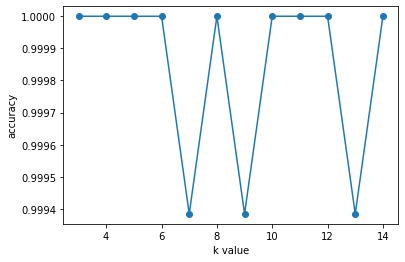

In [33]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc_values.append(accuracy_score(y_test,y_pred))
plt.plot(neighbors,acc_values,'-o')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [34]:
classifier=KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 1.0

confusion matrix is :

 [[782   0]
 [  0 843]]


### 7.4 SVM

In [35]:
# SVM Linear model
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred=svm_linear.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 0.9655384615384616

confusion matrix is :

 [[764  18]
 [ 38 805]]


In [36]:
# SVM Polynomial model
svm_poly=SVC(kernel='poly', degree=3)
svm_poly.fit(X_train,y_train)
y_pred=svm_poly.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 1.0

confusion matrix is :

 [[782   0]
 [  0 843]]


In [37]:
# SVM Radial model
svm_radial=SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 1.0

confusion matrix is :

 [[782   0]
 [  0 843]]


### 7.5 Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 1.0

confusion matrix is :

 [[782   0]
 [  0 843]]


### 7.6 Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 1.0

confusion matrix is :

 [[782   0]
 [  0 843]]


### 7.7 Exterme Gradient Boosting

In [40]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 1.0

confusion matrix is :

 [[782   0]
 [  0 843]]


### 7.8 Naive Bayes Classifier

In [41]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 0.7366153846153846

confusion matrix is :

 [[650 132]
 [296 547]]


In [42]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 0.8338461538461538

confusion matrix is :

 [[620 162]
 [108 735]]


#### Here SVM linear model is better as it is not overfitting

In [43]:
# SVM Linear model
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred=svm_linear.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 0.9655384615384616

confusion matrix is :

 [[764  18]
 [ 38 805]]


In [44]:
data.loc[data['class']==1].index

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            8107, 8109, 8110, 8111, 8112, 8115, 8119, 8120, 8121, 8123],
           dtype='int64', length=4208)

In [45]:
data.loc[data['class']==0].index

Int64Index([   0,    3,    8,   13,   17,   18,   19,   21,   25,   31,
            ...
            8097, 8098, 8101, 8108, 8113, 8114, 8116, 8117, 8118, 8122],
           dtype='int64', length=3916)

In [46]:
## Checking avalue for 0 class
data.loc[3].values

array([0, 3, 3, 9, 1, 8, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [47]:
inp=[[3, 3, 9, 1, 8, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
y=svm_linear.predict(inp)
y

array([0], dtype=int64)

In [48]:
## Checking avalue for 1 class
data.loc[1].values

array([ 1,  3,  4, 10,  1,  1,  3,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2], dtype=int64)

In [49]:
inp=[[3,  4, 10,  1,  1,  3,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1, 1,  2,  2,  2]]
y=svm_linear.predict(inp)
y

array([1], dtype=int64)

# 8. Checking important features using Chi-square test

In [50]:
import scipy.stats

In [51]:
props=list(data.columns)
props.remove('class')
pval=[]
chi=[]
for i in props:
    ct=pd.crosstab(data[i],columns=data['class'])
    chi2, p, ddof, expected = scipy.stats.chi2_contingency(ct)
    pval.append(p)
    chi.append(chi2)
chisq1=pd.DataFrame()
chisq1['Properties']=props
chisq1['P value']=pval
chisq1['Chi Square value']=chi
chisq1.sort_values('Chi Square value',ascending=False)

Properties        P value  Chi Square value
4                       odor   0.000000e+00       7659.726740
17         spore-print-color   0.000000e+00       4602.033170
8                 gill-color   0.000000e+00       3765.714086
16                 ring-type   0.000000e+00       2956.619278
10  stalk-surface-above-ring   0.000000e+00       2808.286287
11  stalk-surface-below-ring   0.000000e+00       2684.474076
7                  gill-size   0.000000e+00       2366.834257
12    stalk-color-above-ring   0.000000e+00       2237.898496
13    stalk-color-below-ring   0.000000e+00       2152.390891
3                    bruises   0.000000e+00       2041.415647
18                population   0.000000e+00       1929.740891
19                   habitat   0.000000e+00       1573.777261
6               gill-spacing  5.022978e-216        984.143333
0                  cap-shape  1.196457e-103        489.919954
2                  cap-color   6.055815e-78        387.597769
15               ring-number   4.235758e-82        374.736831
1                cap-surface   5.518427e-68        315.042831
14                veil-color   3.320973e-41        191.223702
5            gill-attachment   5.501707e-31        133.986181
9                stalk-shape   4.604746e-20         84.142038

x2 = data[['odor','spore-print-color','gill-color','ring-type','stalk-surface-above-ring','stalk-color-below-ring','gill-size','bruises','population','habitat']]
y2 = data['class']

In [52]:
x2 = data[['odor','spore-print-color','gill-color','ring-type','stalk-surface-above-ring','stalk-surface-below-ring','gill-size','stalk-color-above-ring','stalk-color-below-ring','bruises','population','habitat']]
y2 = data['class']

In [53]:
x2.head()

odor  spore-print-color  gill-color  ring-type  stalk-surface-above-ring  \
0     8                  1           1          1                         1   
1     1                  2           1          1                         1   
2     2                  2           2          1                         1   
3     8                  1           2          1                         1   
4     7                  2           1          2                         1   

   stalk-surface-below-ring  gill-size  stalk-color-above-ring  \
0                         1          1                       1   
1                         1          2                       1   
2                         1          2                       1   
3                         1          1                       1   
4                         1          2                       1   

   stalk-color-below-ring  bruises  population  habitat  
0                       1        1           1        1  
1                       1        1           2        2  
2                       1        1           2        3  
3                       1        1           1        1  
4                       1        0           3        2

In [54]:
X_train,X_test,y_train,y_test=train_test_split(x2,y2,random_state=42,test_size=0.2)

In [55]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 0.9150769230769231

confusion matrix is :

 [[728  54]
 [ 84 759]]


In [56]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred1=svm_linear.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred1))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred1))


Accuracy is: 0.9138461538461539

confusion matrix is :

 [[743  39]
 [101 742]]


In [57]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 1.0

confusion matrix is :

 [[782   0]
 [  0 843]]


In [58]:
classifier=KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 1.0

confusion matrix is :

 [[782   0]
 [  0 843]]


In [59]:
# SVM Polynomial model
svm_poly=SVC(kernel='poly', degree=3)
svm_poly.fit(X_train,y_train)
y_pred=svm_poly.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 1.0

confusion matrix is :

 [[782   0]
 [  0 843]]


In [60]:
# SVM Radial model
svm_radial=SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 0.9993846153846154

confusion matrix is :

 [[781   1]
 [  0 843]]


In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 1.0

confusion matrix is :

 [[782   0]
 [  0 843]]


In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 1.0

confusion matrix is :

 [[782   0]
 [  0 843]]


In [63]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 1.0

confusion matrix is :

 [[782   0]
 [  0 843]]


In [64]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 0.7366153846153846

confusion matrix is :

 [[650 132]
 [296 547]]


In [65]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print('\nAccuracy is:',accuracy_score(y_test,y_pred))
print('\nconfusion matrix is :\n\n',confusion_matrix(y_test,y_pred))


Accuracy is: 0.8369230769230769

confusion matrix is :

 [[640 142]
 [123 720]]
